# Phase 5 Capstone

# Predicting Obesity/ Obesity Prediction

- Student name: Lucas Wilkerson
- Student pace: Flex/part time
- Scheduled project review date/time:
- Instructor name: Morgan Jones

## Business Understanding 
Obesity is a significant public health concern in the United States and globally that contributes to adverse effects on an individual's health and places a great economic burden on healthcare systems. Addressing obesity requires a comprehensive understanding of its determinants and what various lifestyle factors and influencers seem to contribute to its prevalence. 

With obesity being significant issue that can have problematic implications, a team of public health professionals is seeking to understand what various factors contribute to obesity and could predict the development of obesity diagnosis. By understanding the various lifestyle, diet and demographic factors that lead to obesity, they can develop plans and interventions to both reduce obesity rates and improve overall health. 

To help determine the best areas of focus, this project aims to investigate the various diet, demographic and lifestyle factors that contribute to obesity rates within the US population by exploring the Behavioral Risk Factor Surveillance System (BRFSS) dataset. I plan to use exploratory data analysis to understand the data and help determine what factors best contribute to obesity. From there, predictive modeling will be incorporated to develop a model to predict or classify obesity based on the data and the features uncovered. 

The findings from this analysis will be able to help inform and guide public health strategies, interventions, and policies aimed at reducing obesity rates and promoting healthier lifestyles. 


## Data Understanding 

The primary dataset for this project is from the Behavioral Risk Factor Surveillance System (BRFSS) dataset, available on Kaggle and also found on the CDC's website. The BRFSS is done annually via telephone surveys, and provides comprehensive data that is collected from U.S. residents regarding their health-related risk behaviors, chronic health conditions, their use of preventive services, and other various diet and lifestyle factors. The dataset includes variables such as demographics (age, gender, race/ethnicity), physical activity levels, health indicators (obesity status), and other various factors. 

This dataset from the 2022 BRFSS contains 445132 entries and have 326 columns representing the multiple features. For this analysis, I plan to use a subset of the columns representing a variety of features that could be linked with obesity or may be interesting to explore in relation to the target variable.  


- Data Source: Behavioral Risk Factor Surveillance System (BRFSS) dataset from Kaggle (https://www.kaggle.com/datasets/ariaxiong/behavioral-risk-factor-surveillance-system-2022/data)

- Link to original data source from the CDC on Data.gov ( https://www.cdc.gov/brfss/annual_data/annual_2022.html) 
 
- For additional feature information and description along the code description for the values, those can be found at the CDC's link for the 2022 BRFSS (https://www.cdc.gov/brfss/annual_data/annual_2022.html)





## Data Preparation

Before building the model, the data underwent several preprocessing steps including:

- Filtering columns down to including necessary columns for anlaysis
- Cleaning data to remove missing/null values and placeholder values
- Data distribution analysis to understand the class balance or imbalance
- Visualizing different features to understand distribution and relationship with variable

  
During data preparation and preprocessing data was prepared for modeling by the following:

- Data was rescaled and normalized to the range [0,1] for modeling 
- Class imbalance was accounted for by utilizing SMOTE
- The data was also subsampled for the modeling process to allow for shorter computation run times. Twenty-five percent of the data was used for training.

## Modeling 

### Baseline Model/ Model 1:

A Baseline Logistic Regression model was constructed for this project. The model was a simplae logistic regression model with defualt parameters. The main metrics used to evaluate model performance included accuracy, recall and f1 score. The baseline model had a test accuracy of 0.6993, test recall of 0.9226, and a test f1 score of 0.6719.

- Model's Accuracy Score: 0.6993164651483386
- Model's F1 Score: 0.6718796521194077
- Model's Recall Score: 0.9226200723016009


### Best Performing Model/ Model 2:
The best model of the adjusted/tuned nerual network model had an architecture made of multiple dense layers with adjustments made to the learning rate, number of filters, class balance, batch size and number of epochs. Learning rate was adjust to 0.001 and batch size was equal to 50 with total epochs being 5. The Best Model had a test accuracy of 0.7006 and test recall of 0.9324, which indicates that out of all of the individuals with obesity, the model correctly labeled ~93.24% of the individuals that actually. Performance with test recall and test accuracy were improved compared to baseline, however f1 score was slightly lower. 

With the best performing model (tuned neural network) the scores were:

- Model's Accuracy Score: 0.7005801200866699
- Model's F1 Score: 0.6671204566955566
- Model's Recall Score: 0.9323569536209106




## Evaluation

The adjusted/tuned neural network model is the ideal model to choose here because it performs better at correctly classifying/ predicting individuals as shown by the slight improvement in test accuracy, test recall, and f1-score. While this model is higher with recall and correctly identifying those with obesity, there is the chance for more false positive results (individuals being classified as having obesity who in fact do not). This is more ideal because we would rather correctly identify positive cases than to not identify someone with obesity because interventions or recommendations that are usually geared towards addressing obesity are generally good recommendations for anyone to partake in or be aware of for health in general.

In [23]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

# Importing standard Packages 
import pandas as pd
import numpy as np
import math 
import zipfile

# Importing packages for visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px



# Importing necessary packages
import statsmodels.api as sm
import sklearn.metrics as metrics
from scipy import stats
from scipy.stats import kstest
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import RocCurveDisplay, confusion_matrix, classification_report, make_scorer
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_curve, auc
from sklearn.metrics import log_loss, ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import (VarianceThreshold, SelectKBest, f_regression, mutual_info_regression, 
    RFE, RFECV)
from xgboost import XGBClassifier, plot_importance
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler



import tensorflow as tf
from keras import datasets, layers, models

from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization, Activation
from keras import optimizers 
from keras.optimizers import Adam , SGD, RMSprop
from keras.metrics import Accuracy, Recall
from keras import regularizers
from keras.regularizers import l1 , l2 
from keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

import os


In [24]:
# Function to load dataset 

def load_csv_from_zip(zip_file_path, csv_file_name):
    
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # Check if the CSV file exists in the zip file
        if csv_file_name in zip_ref.namelist():
            # Read the CSV file directly into a DataFrame
            with zip_ref.open(csv_file_name) as csv_file:
                df = pd.read_csv(csv_file)
                return df
        else:
            print(f"CSV file '{csv_file_name}' not found in the zip file.")
            return None

zip_file_path = "data/brfss2022.csv.zip"
csv_file_name = "brfss2022.csv"
df = load_csv_from_zip(zip_file_path, csv_file_name)
if df is not None:
    print("CSV file loaded successfully!")
    print(df.head())  # Display the first few rows of the DataFrame

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

# Previewing general information on dataset
print(df.info())

CSV file loaded successfully!
   _STATE  FMONTH    IDATE  IMONTH  IDAY  IYEAR  DISPCODE       SEQNO  \
0     1.0     1.0  2032022       2     3   2022    1100.0  2022000001   
1     1.0     1.0  2042022       2     4   2022    1100.0  2022000002   
2     1.0     1.0  2022022       2     2   2022    1100.0  2022000003   
3     1.0     1.0  2032022       2     3   2022    1100.0  2022000004   
4     1.0     1.0  2022022       2     2   2022    1100.0  2022000005   

           _PSU  CTELENM1  PVTRESD1  COLGHOUS  STATERE1  CELPHON1  LADULT1  \
0  2.022000e+09       1.0       1.0       NaN       1.0       2.0      1.0   
1  2.022000e+09       1.0       1.0       NaN       1.0       2.0      1.0   
2  2.022000e+09       1.0       1.0       NaN       1.0       2.0      1.0   
3  2.022000e+09       1.0       1.0       NaN       1.0       2.0      1.0   
4  2.022000e+09       1.0       1.0       NaN       1.0       2.0      1.0   

   COLGSEX1  NUMADULT  LANDSEX1  NUMMEN  NUMWOMEN  RESPSLCT  S

In [25]:
# Display the first few rows to understand the structure of the dataset
print(df.head())

# Loop through the columns to get column names and data types
for column in df.columns:
    print(column, df[column].dtype)

# Get unique values for each column
for column in df.columns:
    print(column, df[column].unique())

# Previewing df shape
print(df.shape)

#Printing out the total number of rows and columns in the BRFSS dataset
n_rows, n_cols = df.shape
print('The number of rows in the dataset is', n_rows)
print('The number of columns in the dataset is', n_cols)

   _STATE  FMONTH    IDATE  IMONTH  IDAY  IYEAR  DISPCODE       SEQNO  \
0     1.0     1.0  2032022       2     3   2022    1100.0  2022000001   
1     1.0     1.0  2042022       2     4   2022    1100.0  2022000002   
2     1.0     1.0  2022022       2     2   2022    1100.0  2022000003   
3     1.0     1.0  2032022       2     3   2022    1100.0  2022000004   
4     1.0     1.0  2022022       2     2   2022    1100.0  2022000005   

           _PSU  CTELENM1  PVTRESD1  COLGHOUS  STATERE1  CELPHON1  LADULT1  \
0  2.022000e+09       1.0       1.0       NaN       1.0       2.0      1.0   
1  2.022000e+09       1.0       1.0       NaN       1.0       2.0      1.0   
2  2.022000e+09       1.0       1.0       NaN       1.0       2.0      1.0   
3  2.022000e+09       1.0       1.0       NaN       1.0       2.0      1.0   
4  2.022000e+09       1.0       1.0       NaN       1.0       2.0      1.0   

   COLGSEX1  NUMADULT  LANDSEX1  NUMMEN  NUMWOMEN  RESPSLCT  SAFETIME  \
0       NaN       2

Initially the dataset contains 445132 entries and have 326 columns representing the multiple features. For this analysis, I plan to use a subset of the columns representing a variety of features that could be linked with obesity or may be interesting to explore in relation to the target variable. Those will be separated out below.

In [26]:
#Selecting a subset of relevant columns out of the 326 variables in the data for exploratory analysis----------------------
col_selected = [ #Record Identification/ Demographics----------------------------------------------------------------------
            '_STATE', '_SEX', '_AGE80', '_AGE_G', 'MARITAL','_EDUCAG', '_INCOMG1', 
            'VETERAN3', 'EMPLOY1', '_CHLDCNT', '_METSTAT', '_URBSTAT', '_IMPRACE', '_RACE1', '_RACEPR1', '_HISPANC', 
                #Health Status/ Metrics------------------------------------------------------------------------------------
            '_BMI5', 'GENHLTH', '_RFHLTH','PHYSHLTH', '_PHYS14D',
            'MENTHLTH', '_MENT14D', 'EXERANY2', '_TOTINDA', 'SLEPTIM1', 
            '_HLTHPLN', 'PERSDOC3', 'CHECKUP1', 'ADDEPEV3', '_DRDXAR2', '_MICHD',  
            'DIABETE4',   
                #Tobacco use-----------------------------------------------------------------------------------------------
            '_SMOKER3', '_CURECI2', 
                #Alcohol consumption---------------------------------------------------------------------------------------
            'DRNKANY6', '_RFBING6']

# Creating dataset of selected variables 
df_subset = df[col_selected].copy()
print(df_subset.info())

#Previewing first 10 rows 
df_subset.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 37 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _STATE    445132 non-null  float64
 1   _SEX      445132 non-null  float64
 2   _AGE80    445132 non-null  float64
 3   _AGE_G    445132 non-null  float64
 4   MARITAL   445124 non-null  float64
 5   _EDUCAG   445132 non-null  float64
 6   _INCOMG1  445132 non-null  float64
 7   VETERAN3  440959 non-null  float64
 8   EMPLOY1   438936 non-null  float64
 9   _CHLDCNT  445131 non-null  float64
 10  _METSTAT  435724 non-null  float64
 11  _URBSTAT  435724 non-null  float64
 12  _IMPRACE  445132 non-null  float64
 13  _RACE1    445130 non-null  float64
 14  _RACEPR1  445132 non-null  float64
 15  _HISPANC  445132 non-null  float64
 16  _BMI5     396326 non-null  float64
 17  GENHLTH   445129 non-null  float64
 18  _RFHLTH   445132 non-null  float64
 19  PHYSHLTH  445127 non-null  float64
 20  _PHY

,_STATE,_SEX,_AGE80,_AGE_G,MARITAL,_EDUCAG,_INCOMG1,VETERAN3,EMPLOY1,_CHLDCNT,_METSTAT,_URBSTAT,_IMPRACE,_RACE1,_RACEPR1,_HISPANC,_BMI5,GENHLTH,_RFHLTH,PHYSHLTH,_PHYS14D,MENTHLTH,_MENT14D,EXERANY2,_TOTINDA,SLEPTIM1,_HLTHPLN,PERSDOC3,CHECKUP1,ADDEPEV3,_DRDXAR2,_MICHD,DIABETE4,_SMOKER3,_CURECI2,DRNKANY6,_RFBING6
0,1.0,2.0,80.0,6.0,1.0,4.0,9.0,2.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,2.0,1.0,88.0,1.0,88.0,1.0,2.0,2.0,8.0,9.0,1.0,1.0,2.0,2.0,2.0,1.0,4.0,1.0,2.0,1.0
1,1.0,2.0,80.0,6.0,3.0,2.0,3.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2657.0,1.0,1.0,88.0,1.0,88.0,1.0,2.0,2.0,6.0,1.0,2.0,8.0,2.0,2.0,2.0,3.0,4.0,1.0,2.0,1.0
2,1.0,2.0,56.0,5.0,1.0,4.0,6.0,2.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2561.0,2.0,1.0,2.0,2.0,3.0,2.0,1.0,1.0,5.0,1.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,2.0,1.0
3,1.0,2.0,73.0,6.0,1.0,2.0,9.0,2.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2330.0,1.0,1.0,88.0,1.0,88.0,1.0,1.0,1.0,7.0,9.0,1.0,1.0,2.0,1.0,2.0,3.0,2.0,1.0,2.0,1.0
4,1.0,2.0,43.0,3.0,1.0,3.0,3.0,2.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2177.0,4.0,2.0,2.0,2.0,88.0,1.0,1.0,1.0,9.0,1.0,2.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,1.0,1.0
5,1.0,1.0,80.0,6.0,1.0,2.0,9.0,2.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2608.0,5.0,2.0,1.0,2.0,88.0,1.0,2.0,2.0,7.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,4.0,1.0,2.0,1.0
6,1.0,2.0,80.0,6.0,2.0,4.0,5.0,2.0,7.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2296.0,2.0,1.0,88.0,1.0,88.0,1.0,1.0,1.0,7.0,1.0,1.0,1.0,2.0,2.0,2.0,3.0,3.0,1.0,1.0,1.0
7,1.0,2.0,80.0,6.0,3.0,2.0,5.0,2.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2781.0,3.0,1.0,88.0,1.0,88.0,1.0,2.0,2.0,8.0,1.0,1.0,1.0,2.0,1.0,2.0,3.0,4.0,1.0,2.0,1.0
8,1.0,2.0,78.0,6.0,1.0,4.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,3.0,1.0,88.0,1.0,88.0,1.0,1.0,1.0,6.0,1.0,1.0,1.0,2.0,1.0,2.0,3.0,3.0,1.0,2.0,1.0
9,1.0,2.0,72.0,6.0,1.0,4.0,5.0,2.0,7.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2905.0,3.0,1.0,1.0,2.0,88.0,1.0,1.0,1.0,7.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,4.0,1.0,1.0,1.0


The new reduced dataset contains 445132 entries but the columns have been reduced down to 37. There is not a column for the target variable of obesity status so that will be created and added to the current dataset. 

In [27]:
# Define a threshold for obesity and for overweight 
obesity_threshold = 30.0  # BMI greater than or equal to 30 is considered obese
overweight_threshold = 25.0  # BMI greater than or equal to 25 is considered overweight 

# Create a new column indicating whether Obesity and Overweight status based on current _BMI5 columns
df_subset['Obese'] = (df_subset["_BMI5"] * 0.01) >= obesity_threshold
df_subset['Overweight'] = (df_subset["_BMI5"] * 0.01) >= overweight_threshold

# Convert boolean values to binary (1 for obese, 0 for not obese)
df_subset['Obese'] = df_subset['Obese'].astype(int)
df_subset['Overweight'] = df_subset['Overweight'].astype(int)

print(df_subset.info())
print(df_subset.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 39 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   _STATE      445132 non-null  float64
 1   _SEX        445132 non-null  float64
 2   _AGE80      445132 non-null  float64
 3   _AGE_G      445132 non-null  float64
 4   MARITAL     445124 non-null  float64
 5   _EDUCAG     445132 non-null  float64
 6   _INCOMG1    445132 non-null  float64
 7   VETERAN3    440959 non-null  float64
 8   EMPLOY1     438936 non-null  float64
 9   _CHLDCNT    445131 non-null  float64
 10  _METSTAT    435724 non-null  float64
 11  _URBSTAT    435724 non-null  float64
 12  _IMPRACE    445132 non-null  float64
 13  _RACE1      445130 non-null  float64
 14  _RACEPR1    445132 non-null  float64
 15  _HISPANC    445132 non-null  float64
 16  _BMI5       396326 non-null  float64
 17  GENHLTH     445129 non-null  float64
 18  _RFHLTH     445132 non-null  float64
 19  PH

With the new variables, the dataset now has a total of 39 columns still containing the 445132 rows. Upon observation of the data and the supplement codebook for the dataset we can that the dataset does contain null values and also placeholder values for other missing values. Those will be addressed during the preprocessing stage. 



## Data Preparation/ Preprocessing 

To start data preparation and preprocessing, the dataset will be split into training and test sets. This is done to avoid any data leakage so that there is an unseen test set to evaluate the predictive models. 

In [28]:
# Copying full df
df_subset_orginal = df_subset.copy()

# Separate features and target variable
X = df_subset.drop(['Obese'], axis=1)
y = df_subset['Obese']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify = y)

In [29]:
# Concatenating x and y train for processesing
df_train = pd.concat([X_train, y_train], axis=1)
X_train = df_train.copy()

In [30]:
# Checking for duplicates
print(X_train.duplicated().sum())
X_train.drop_duplicates(inplace=True)
print(X_train.duplicated().sum())


# Compute missing values for each column
percent_missing = ((X_train.isnull() | X_train.isna()).sum() * 100 / len(df)).round(2)
X_train_missing_value = pd.DataFrame({'column_name': X_train.columns,
                                     'percent_missing': percent_missing})
print("Missing values for DataFrame:")
print(X_train_missing_value)
print()

# Displaying sum of misssing for each column
pd.set_option('display.max_rows', 500)
print(X_train.isna().sum())

#Inspecting unique values and value counts for all variables
for col in X_train:
    print(f"{col} - unique values: ")
    print(df_subset[col].unique(), "\n")
    print("------------------------------------")

12
0
Missing values for DataFrame:
           column_name  percent_missing
_STATE          _STATE             0.00
_SEX              _SEX             0.00
_AGE80          _AGE80             0.00
_AGE_G          _AGE_G             0.00
MARITAL        MARITAL             0.00
_EDUCAG        _EDUCAG             0.00
_INCOMG1      _INCOMG1             0.00
VETERAN3      VETERAN3             0.71
EMPLOY1        EMPLOY1             1.06
_CHLDCNT      _CHLDCNT             0.00
_METSTAT      _METSTAT             1.58
_URBSTAT      _URBSTAT             1.58
_IMPRACE      _IMPRACE             0.00
_RACE1          _RACE1             0.00
_RACEPR1      _RACEPR1             0.00
_HISPANC      _HISPANC             0.00
_BMI5            _BMI5             8.21
GENHLTH        GENHLTH             0.00
_RFHLTH        _RFHLTH             0.00
PHYSHLTH      PHYSHLTH             0.00
_PHYS14D      _PHYS14D             0.00
MENTHLTH      MENTHLTH             0.00
_MENT14D      _MENT14D             0.00
EXERA

Looking at the null values, there are 7 columns initially showing missing values. Upon further inspection and checking with the codebook, there are additional columns with missing values that are filled with placeholder values such as 9.0, 99.0, 77.0, 9900.0, 7.0, 9999.0, and 7777.0. 

The _BMI5 column seemed to have the highest percent missing. With this being a numerical column, to address the missing values I plan to fill them with the columns median value. 

Regarding the other columns with missing values, these will be dropped since the percentage of values is lower. 

In [31]:
# Imputing missing values for numerical variables with median
numerical_cols = ['_BMI5']
for col in numerical_cols:
    median_val = X_train[col].median()
    X_train[col].fillna(median_val, inplace=True)

# Storing median value for future preparation
train_median_bmi = median_val

# Dropping rest of Na Values as they are a very low percentage 
X_train = X_train.dropna().copy()

# Verify if there are any missing values remaining
missing_values = X_train.isnull().sum()
print("Remaining missing values:\n", missing_values[missing_values > 0])

print(X_train.isna().sum())

print(X_train.info())


Remaining missing values:
 Series([], dtype: int64)
_STATE        0
_SEX          0
_AGE80        0
_AGE_G        0
MARITAL       0
_EDUCAG       0
_INCOMG1      0
VETERAN3      0
EMPLOY1       0
_CHLDCNT      0
_METSTAT      0
_URBSTAT      0
_IMPRACE      0
_RACE1        0
_RACEPR1      0
_HISPANC      0
_BMI5         0
GENHLTH       0
_RFHLTH       0
PHYSHLTH      0
_PHYS14D      0
MENTHLTH      0
_MENT14D      0
EXERANY2      0
_TOTINDA      0
SLEPTIM1      0
_HLTHPLN      0
PERSDOC3      0
CHECKUP1      0
ADDEPEV3      0
_DRDXAR2      0
_MICHD        0
DIABETE4      0
_SMOKER3      0
_CURECI2      0
DRNKANY6      0
_RFBING6      0
Overweight    0
Obese         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 316858 entries, 383796 to 36923
Data columns (total 39 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   _STATE      316858 non-null  float64
 1   _SEX        316858 non-null  float64
 2   _AGE80      316858 non-null 

With the obvious null values removed, next I plan to address and remove the placeholder values. 

In [32]:
# Copying X_train df 
X_train_main = X_train.copy()

# Separating out columns into separate df based on which placeholder value it uses
X_train1 = X_train[['_HLTHPLN', 'DRNKANY6', '_RFBING6', '_EDUCAG',
                   '_CURECI2', '_SMOKER3', 'CHECKUP1', 'ADDEPEV3',
                   'DIABETE4', 'PERSDOC3', 'EXERANY2', '_TOTINDA', 
                    '_PHYS14D', '_MENT14D', '_RFHLTH', 'GENHLTH', 
                    '_HISPANC', '_CHLDCNT', 'VETERAN3', 'MARITAL']]

print(X_train1.info())

X_train2 = X_train[['MENTHLTH', 'PHYSHLTH', 'SLEPTIM1']]

print(X_train2.info())

X_train3 = X_train[['_INCOMG1', 'EMPLOY1', '_RACE1']]

print(X_train3.info())

X_train4 = X_train.drop(columns = ['_INCOMG1', 'EMPLOY1', '_RACE1', 'MENTHLTH', 
                                   'PHYSHLTH', 'SLEPTIM1', '_HLTHPLN', 'DRNKANY6', 
                                   '_RFBING6', '_EDUCAG', '_CURECI2', '_SMOKER3', 
                                   'CHECKUP1', 'ADDEPEV3', 'DIABETE4', 'PERSDOC3', 
                                   'EXERANY2', '_TOTINDA', '_PHYS14D', '_MENT14D', 
                                   '_RFHLTH', 'GENHLTH', '_HISPANC', '_CHLDCNT', 
                                   'VETERAN3','MARITAL'], axis = 1)

print(X_train4.info())

<class 'pandas.core.frame.DataFrame'>
Index: 316858 entries, 383796 to 36923
Data columns (total 20 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _HLTHPLN  316858 non-null  float64
 1   DRNKANY6  316858 non-null  float64
 2   _RFBING6  316858 non-null  float64
 3   _EDUCAG   316858 non-null  float64
 4   _CURECI2  316858 non-null  float64
 5   _SMOKER3  316858 non-null  float64
 6   CHECKUP1  316858 non-null  float64
 7   ADDEPEV3  316858 non-null  float64
 8   DIABETE4  316858 non-null  float64
 9   PERSDOC3  316858 non-null  float64
 10  EXERANY2  316858 non-null  float64
 11  _TOTINDA  316858 non-null  float64
 12  _PHYS14D  316858 non-null  float64
 13  _MENT14D  316858 non-null  float64
 14  _RFHLTH   316858 non-null  float64
 15  GENHLTH   316858 non-null  float64
 16  _HISPANC  316858 non-null  float64
 17  _CHLDCNT  316858 non-null  float64
 18  VETERAN3  316858 non-null  float64
 19  MARITAL   316858 non-null  float64
dtypes: fl

In [33]:
# Looping through columns to remove placeholder values 
for col in X_train1.columns:
    X_train1 = X_train1[X_train1[col] != 7777.0]
    X_train1 = X_train1[X_train1[col] != 9999.0]
    X_train1 = X_train1[X_train1[col] != 77.0]
    X_train1 = X_train1[X_train1[col] != 99.0]
    X_train1 = X_train1[X_train1[col] != 9.0]
    X_train1 = X_train1[X_train1[col] != 7.0]
    X_train1 = X_train1[X_train1[col] != 9900.0]
    

for col in X_train2.columns:
    X_train2 = X_train2[X_train2[col] != 77.0]
    X_train2 = X_train2[X_train2[col] != 99.0]


for col in X_train3.columns:
    X_train3 = X_train3[X_train3[col] != 9.0]
 


X_train_no_na = pd.concat([X_train1, X_train2, X_train3, X_train4], axis=1)


# Drop rows with NaNs in the specified columns
X_train_no_na.dropna(inplace=True)
X_train_no_na.info()



<class 'pandas.core.frame.DataFrame'>
Index: 209405 entries, 383796 to 36923
Data columns (total 39 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   _HLTHPLN    209405 non-null  float64
 1   DRNKANY6    209405 non-null  float64
 2   _RFBING6    209405 non-null  float64
 3   _EDUCAG     209405 non-null  float64
 4   _CURECI2    209405 non-null  float64
 5   _SMOKER3    209405 non-null  float64
 6   CHECKUP1    209405 non-null  float64
 7   ADDEPEV3    209405 non-null  float64
 8   DIABETE4    209405 non-null  float64
 9   PERSDOC3    209405 non-null  float64
 10  EXERANY2    209405 non-null  float64
 11  _TOTINDA    209405 non-null  float64
 12  _PHYS14D    209405 non-null  float64
 13  _MENT14D    209405 non-null  float64
 14  _RFHLTH     209405 non-null  float64
 15  GENHLTH     209405 non-null  float64
 16  _HISPANC    209405 non-null  float64
 17  _CHLDCNT    209405 non-null  float64
 18  VETERAN3    209405 non-null  float64
 19  MAR

In [34]:
# Inspecting unique values and value counts for all variables
for col in X_train_no_na.columns:
    print(f"{col} - unique values and counts:")
    unique_values = X_train_no_na[col].unique()
    for value in unique_values:
        count = X_train_no_na[col].value_counts()[value]
        print(f"Value: {value}, Count: {count}")
    print("------------------------------------")

_HLTHPLN - unique values and counts:
Value: 1.0, Count: 199656
Value: 2.0, Count: 9749
------------------------------------
DRNKANY6 - unique values and counts:
Value: 1.0, Count: 117064
Value: 2.0, Count: 92341
------------------------------------
_RFBING6 - unique values and counts:
Value: 1.0, Count: 176775
Value: 2.0, Count: 32630
------------------------------------
_EDUCAG - unique values and counts:
Value: 4.0, Count: 95796
Value: 2.0, Count: 47015
Value: 3.0, Count: 57500
Value: 1.0, Count: 9094
------------------------------------
_CURECI2 - unique values and counts:
Value: 1.0, Count: 198275
Value: 2.0, Count: 11130
------------------------------------
_SMOKER3 - unique values and counts:
Value: 4.0, Count: 124690
Value: 1.0, Count: 18220
Value: 2.0, Count: 6892
Value: 3.0, Count: 59603
------------------------------------
CHECKUP1 - unique values and counts:
Value: 1.0, Count: 166929
Value: 2.0, Count: 20304
Value: 4.0, Count: 9028
Value: 3.0, Count: 12156
Value: 8.0, Count:

In [35]:
# Creating Adjusted BMI column rounded to two decimal places
X_train_no_na['BMI'] = round(X_train_no_na['_BMI5'] * 0.01, 2)

# 88 is labeled a 0 days planning to replace all rows with values of 88 to 0
# Replacing placeholder values with NaN
placeholders = [88.0]
for col in X_train_no_na[['MENTHLTH', 'PHYSHLTH']]:
    X_train_no_na[col].replace(placeholders, 0 , inplace=True)

X_train_no_na.drop(columns = ['_BMI5'], inplace = True)

# Creating final clean train dataset
X_train_clean = X_train_no_na.copy()
X_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209405 entries, 383796 to 36923
Data columns (total 39 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   _HLTHPLN    209405 non-null  float64
 1   DRNKANY6    209405 non-null  float64
 2   _RFBING6    209405 non-null  float64
 3   _EDUCAG     209405 non-null  float64
 4   _CURECI2    209405 non-null  float64
 5   _SMOKER3    209405 non-null  float64
 6   CHECKUP1    209405 non-null  float64
 7   ADDEPEV3    209405 non-null  float64
 8   DIABETE4    209405 non-null  float64
 9   PERSDOC3    209405 non-null  float64
 10  EXERANY2    209405 non-null  float64
 11  _TOTINDA    209405 non-null  float64
 12  _PHYS14D    209405 non-null  float64
 13  _MENT14D    209405 non-null  float64
 14  _RFHLTH     209405 non-null  float64
 15  GENHLTH     209405 non-null  float64
 16  _HISPANC    209405 non-null  float64
 17  _CHLDCNT    209405 non-null  float64
 18  VETERAN3    209405 non-null  float64
 19  MAR

In [36]:
# Setting X_train
X_train = X_train_clean.copy()

# Setting whole training set for visualization
df_clean_train = X_train.copy()
df_clean_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209405 entries, 383796 to 36923
Data columns (total 39 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   _HLTHPLN    209405 non-null  float64
 1   DRNKANY6    209405 non-null  float64
 2   _RFBING6    209405 non-null  float64
 3   _EDUCAG     209405 non-null  float64
 4   _CURECI2    209405 non-null  float64
 5   _SMOKER3    209405 non-null  float64
 6   CHECKUP1    209405 non-null  float64
 7   ADDEPEV3    209405 non-null  float64
 8   DIABETE4    209405 non-null  float64
 9   PERSDOC3    209405 non-null  float64
 10  EXERANY2    209405 non-null  float64
 11  _TOTINDA    209405 non-null  float64
 12  _PHYS14D    209405 non-null  float64
 13  _MENT14D    209405 non-null  float64
 14  _RFHLTH     209405 non-null  float64
 15  GENHLTH     209405 non-null  float64
 16  _HISPANC    209405 non-null  float64
 17  _CHLDCNT    209405 non-null  float64
 18  VETERAN3    209405 non-null  float64
 19  MAR

The final cleaned training set has 209405 entries with 39 columns, The target variable for analysis is whether an individual has obesity or not. A new column ("Obese") was created for this variable earlier. 

The dataset is now fully clean with no missing values and still maintaining a majority of the training data.

# Data Visualization and Statistics 

In [37]:
# Generating basic descriptive statistics of the numerical variables of the dataset 
df_clean_train.describe()

,_HLTHPLN,DRNKANY6,_RFBING6,_EDUCAG,_CURECI2,_SMOKER3,CHECKUP1,ADDEPEV3,DIABETE4,PERSDOC3,EXERANY2,_TOTINDA,_PHYS14D,_MENT14D,_RFHLTH,GENHLTH,_HISPANC,_CHLDCNT,VETERAN3,MARITAL,MENTHLTH,PHYSHLTH,SLEPTIM1,_INCOMG1,EMPLOY1,_RACE1,_STATE,_SEX,_AGE80,_AGE_G,_METSTAT,_URBSTAT,_IMPRACE,_RACEPR1,_DRDXAR2,_MICHD,Overweight,Obese,BMI
count,209405.000000,209405.000000,209405.000000,209405.000000,209405.000000,209405.000000,209405.000000,209405.000000,209405.000000,209405.000000,209405.000000,209405.000000,209405.000000,209405.000000,209405.000000,209405.000000,209405.000000,209405.000000,209405.000000,209405.000000,209405.000000,209405.000000,209405.000000,209405.000000,209405.000000,209405.000000,209405.000000,209405.000000,209405.000000,209405.000000,209405.000000,209405.000000,209405.000000,209405.000000,209405.000000,209405.000000,209405.000000,209405.000000,209405.000000
mean,1.046556,1.440968,1.155822,3.146095,1.053151,3.388520,1.375426,1.782006,2.742380,1.548449,1.219675,1.219675,1.515069,1.542876,1.162938,2.519152,1.921105,1.505781,1.873317,2.269053,4.353048,4.187016,7.012340,4.539992,3.608495,1.890050,30.229020,1.521339,54.664707,4.377785,1.274860,1.128187,1.622339,1.788658,1.655662,1.911330,0.676163,0.334166,28.714972
std,0.210686,0.496504,0.362688,0.913431,0.224334,0.908543,0.898567,0.412884,0.711084,0.693564,0.414027,0.414027,0.709762,0.720309,0.369310,1.026777,0.269575,0.986423,0.332618,1.683300,8.206379,8.449186,1.427754,1.578637,2.847942,2.079406,15.667746,0.499546,17.150009,1.572652,0.446445,0.334299,1.359704,1.794723,0.475153,0.284268,0.467940,0.471699,6.385086
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,12.050000
25%,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,6.000000,3.000000,1.000000,1.000000,18.000000,1.000000,41.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,24.410000
50%,1.000000,1.000000,1.000000,3.000000,1.000000,4.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,7.000000,5.000000,2.000000,1.000000,29.000000,2.000000,57.000000,5.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000,27.440000
75%,1.000000,2.000000,1.000000,4.000000,1.000000,4.000000,1.000000,2.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.000000,5.000000,3.000000,8.000000,6.000000,7.000000,1.000000,45.000000,2.000000,69.000000,6.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,31.750000
max,2.000000,2.000000,2.000000,4.000000,2.000000,4.000000,8.000000,2.000000,4.000000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,5.000000,2.000000,6.000000,2.000000,6.000000,30.000000,30.000000,24.000000,7.000000,8.000000,8.000000,56.000000,2.000000,80.000000,6.000000,2.000000,2.000000,6.000000,7.000000,2.000000,2.000000,1.000000,1.000000,97.650000


Looking at the general descriptive statistics we can make the following brief observations: 

- Regarding mental and physical health, individuals participating in this survey reported experiencing on average ~ 4 days of poor mental health and ~4 days poor physical health over their last 30 days.
- The average sleep time reported was ~7 hours per night.
- The average BMI of the participants of this survey was ~28.71 which would land in the BMI category of Overweight (25.0-29.9) with the median BMI value being 27.44, also in the Overweight category. 

There are a good amount of categorical variables within this dataset so futher exploration of these variables will continue below with visualizations to gather insight on the distributions. 

# Visualization

## Obesity, Overweight and BMI Distributions

First I plan to explore the target variable of Obesity and the variable of Overweight to get a sense of what those counts look like. Then I plan to look at the spread of BMI values in general over the whole dataset. 

### Getting value counts for Obesity and Overweight 


In [38]:
# Getting value counts for Obesity and Overweight 

print('Raw counts: \n')
print(df_clean_train['Obese'].value_counts())
print('-----------------------------------')
print('Normalized counts: \n')
print(df_clean_train['Obese'].value_counts(normalize=True))

print('-----------------------------------')


print('Raw counts: \n')
print(df_clean_train['Overweight'].value_counts())
print('-----------------------------------')
print('Normalized counts: \n')
print(df_clean_train['Overweight'].value_counts(normalize=True))



Raw counts: 

Obese
0    139429
1     69976
Name: count, dtype: int64
-----------------------------------
Normalized counts: 

Obese
0    0.665834
1    0.334166
Name: proportion, dtype: float64
-----------------------------------
Raw counts: 

Overweight
1    141592
0     67813
Name: count, dtype: int64
-----------------------------------
Normalized counts: 

Overweight
1    0.676163
0    0.323837
Name: proportion, dtype: float64


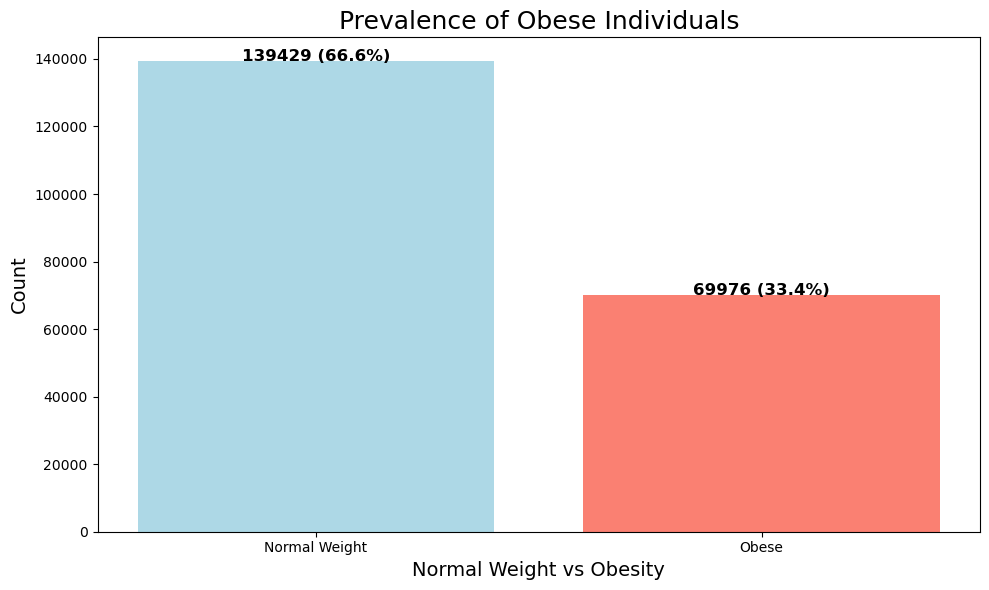

In [39]:
# Plotting visual for target variable of Obesity
outcome_counts = df_clean_train['Obese'].value_counts()

# Calculate percentages
total = outcome_counts.sum()
percentages = [count / total * 100 for count in outcome_counts]

# Define colors and labels
colors = ['lightblue', 'salmon']
labels = ['Normal Weight', 'Obese']

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, outcome_counts.values, color=colors)

# Adding text on top of each bar
for i, (count, percent) in enumerate(zip(outcome_counts, percentages)):
    plt.text(i, count + 50, f"{count} ({percent:.1f}%)", ha='center', fontsize=12, fontweight='bold')

# Adding labels and title
plt.xlabel('Normal Weight vs Obesity', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Prevalence of Obese Individuals', fontsize=18)

# Display the plot
plt.tight_layout()
plt.show()


Looking at obesity within the dataset population, approximately 33.4% of individuals in the training set are classified as obese.

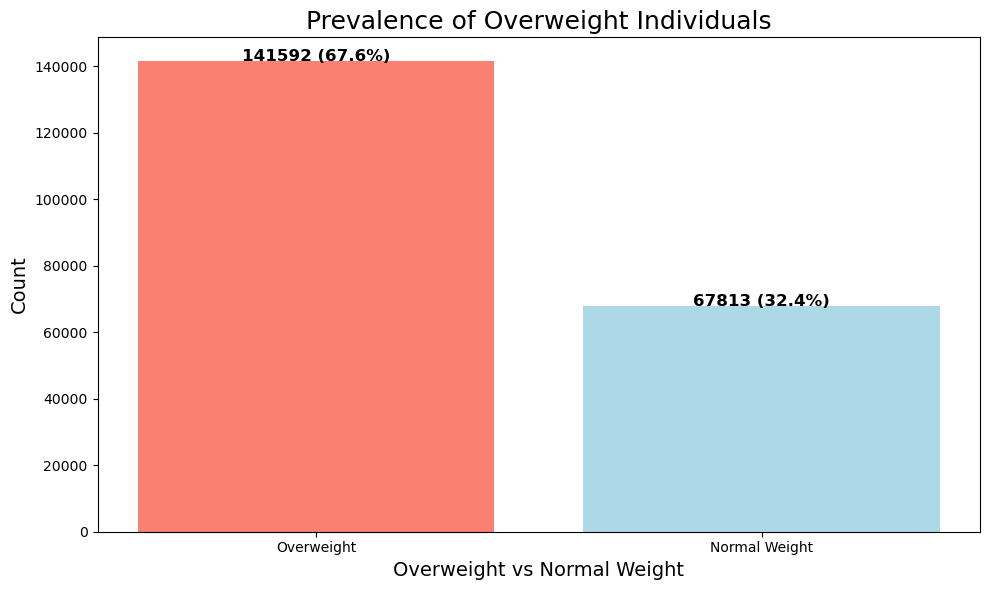

In [40]:
# Plotting visual for Overweight variable
outcome_counts_overweight = df_clean_train['Overweight'].value_counts()

# Calculate percentages
total = outcome_counts_overweight.sum()
percentages = [count / total * 100 for count in outcome_counts_overweight]

# Define colors and labels
colors = ['salmon', 'lightblue']
labels = ['Overweight', 'Normal Weight']

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, outcome_counts_overweight.values, color=colors)

# Adding text on top of each bar
for i, (count, percent) in enumerate(zip(outcome_counts_overweight, percentages)):
    plt.text(i, count + 50, f"{count} ({percent:.1f}%)", ha='center', fontsize=12, fontweight='bold')

# Adding labels and title
plt.xlabel('Overweight vs Normal Weight', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Prevalence of Overweight Individuals', fontsize=18)

# Display the plot
plt.tight_layout()
plt.show()


Looking at individuals who are overweight within the dataset population, approximately 67.6% of the population is overweight. 

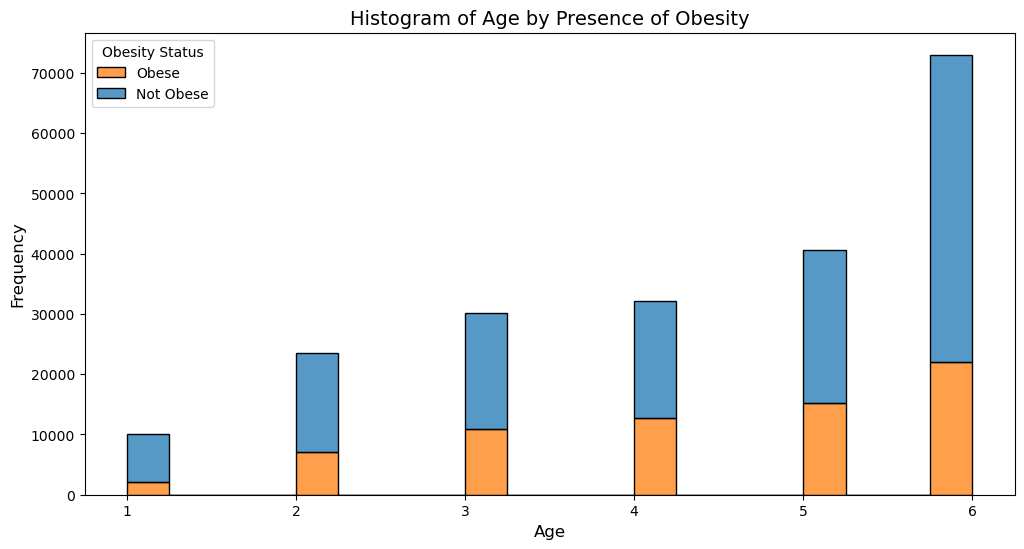

In [41]:
# Histogram of age distribution and presence of obesity
plt.figure(figsize=(12, 6))
sns.histplot(data=df_clean_train, x='_AGE_G', hue='Obese', multiple='stack', bins=20)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Age by Presence of Obesity', fontsize=14)
plt.legend(title='Obesity Status', labels=['Obese', 'Not Obese'])
plt.show()

Looking at the age distribution, it does seem that the age group with the highest amount of obese individuals would be the 65 or older group represented by the x value of 6. While this does have the highest amount of opbese individuals, this happens to also be the group with the highest number of individuals between all age groups. 

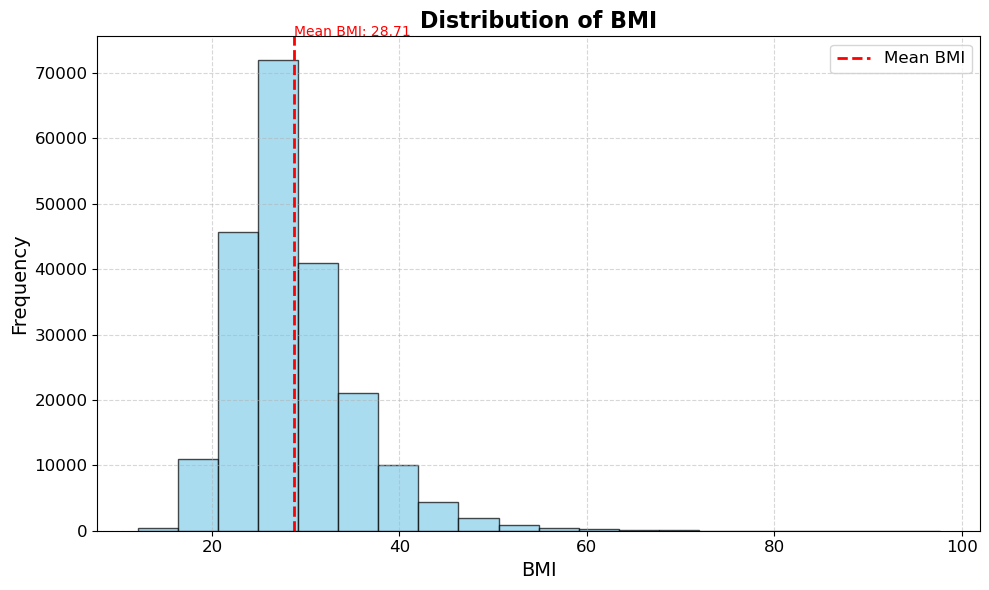

In [42]:
# Plotting Distributions for BMI
# Define column name
column_name = 'BMI'

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_clean_train[column_name], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of BMI', fontsize=16, fontweight='bold')
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.axvline(df_clean_train[column_name].mean(), color='red', linestyle='--', linewidth=2, label='Mean BMI')
plt.legend(fontsize=12)
plt.text(df_clean_train[column_name].mean(), plt.gca().get_ylim()[1],
         f"Mean BMI: {df_clean_train[column_name].mean() :.2f}", fontsize=10, color='red')
plt.tight_layout()
plt.show()

Upon observation of the distribution, the majority of values seem to be between BMI values of 20 to 40 with the heaviest concentration being around the mid to upper 20s. The distribution is slightly skewed to the right. To be classified as overweight BMI has to be 25.0 or over and to be classified as obese BMI has to be 30.0 or over. 

## Physical, Mental and Lifestyle Health Factors

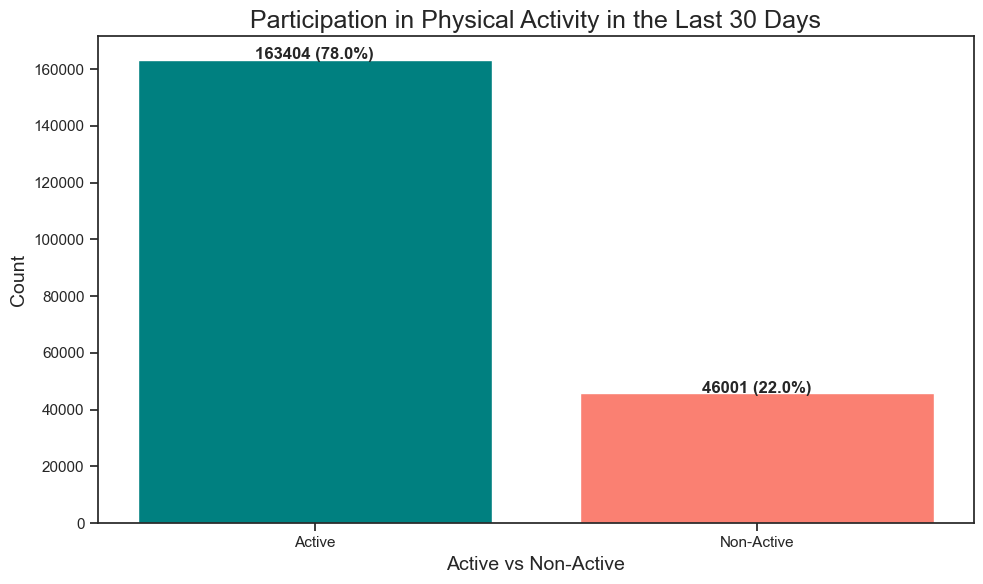

In [58]:
# Plotting visual for Physical Activity
outcome_counts_pa = df_clean_train['_TOTINDA'].value_counts()

# Calculate percentages
total = outcome_counts_pa.sum()
percentages = [count / total * 100 for count in outcome_counts_pa]

# Define colors and labels
colors = ['teal', 'salmon']
labels = ['Active', 'Non-Active']

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, outcome_counts_pa.values, color=colors)

# Adding text on top of each bar
for i, (count, percent) in enumerate(zip(outcome_counts_pa, percentages)):
    plt.text(i, count + 50, f"{count} ({percent:.1f}%)", ha='center', fontsize=12, fontweight='bold')

# Adding labels and title
plt.xlabel('Active vs Non-Active', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Participation in Physical Activity in the Last 30 Days', fontsize=18)

# Display the plot
plt.tight_layout()
plt.show()


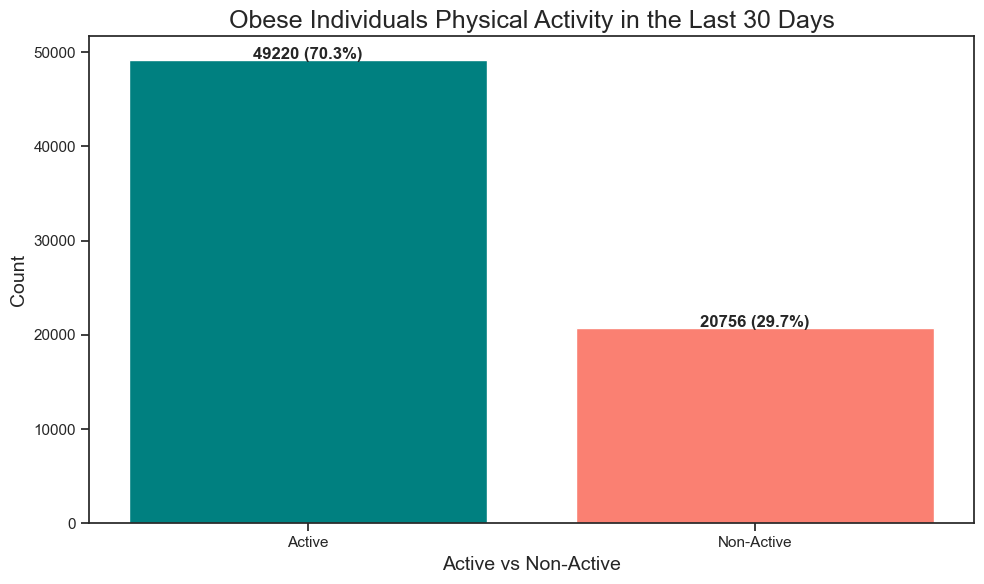

In [57]:
# Separating out only obese individuals in dataset
df_obese = df_clean_train[df_clean_train["Obese"] != 0.0]

# Plotting visual for Physical Activity
outcome_counts_pa = df_obese['_TOTINDA'].value_counts()

# Calculate percentages
total = outcome_counts_pa.sum()
percentages = [count / total * 100 for count in outcome_counts_pa]

# Define colors and labels
colors = ['teal', 'salmon']
labels = ['Active', 'Non-Active']

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, outcome_counts_pa.values, color=colors)

# Adding text on top of each bar
for i, (count, percent) in enumerate(zip(outcome_counts_pa, percentages)):
    plt.text(i, count + 50, f"{count} ({percent:.1f}%)", ha='center', fontsize=12, fontweight='bold')

# Adding labels and title
plt.xlabel('Active vs Non-Active', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Obese Individuals Physical Activity in the Last 30 Days', fontsize=18)

# Display the plot
plt.tight_layout()
plt.show()

Regarding exercise or physical activity, 78% of all individuals reported having engaged in exercise/physical activity in the last 30 days. Comparatively 70% of obese individuals have reported engaging in physcial activity in the last 30 days. 

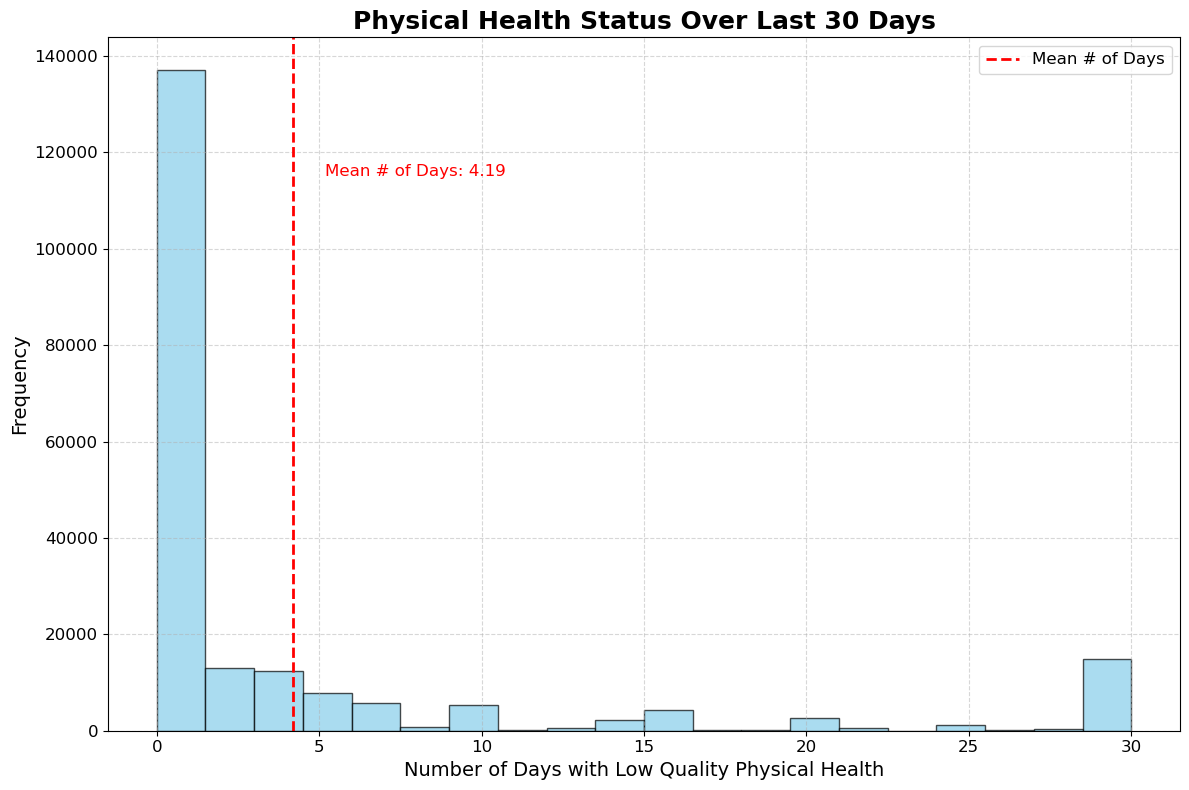

In [44]:
# Plotting Distributions for Physical Health Status

column_name = 'PHYSHLTH'

# Plot histogram
plt.figure(figsize=(12, 8))
plt.hist(df_clean_train[column_name], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Physical Health Status Over Last 30 Days', fontsize=18, fontweight='bold', color='black')
plt.xlabel('Number of Days with Low Quality Physical Health', fontsize=14, color='black')
plt.ylabel('Frequency', fontsize=14, color='black')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.axvline(df_clean_train[column_name].mean(), color='red', linestyle='--', linewidth=2, label='Mean # of Days')
plt.legend(fontsize=12)
plt.text(df_clean_train[column_name].mean() + 1, plt.gca().get_ylim()[1] * 0.8,
         f"Mean # of Days: {df_clean_train[column_name].mean():.2f}", fontsize=12, color='red')
plt.tight_layout()
plt.show()

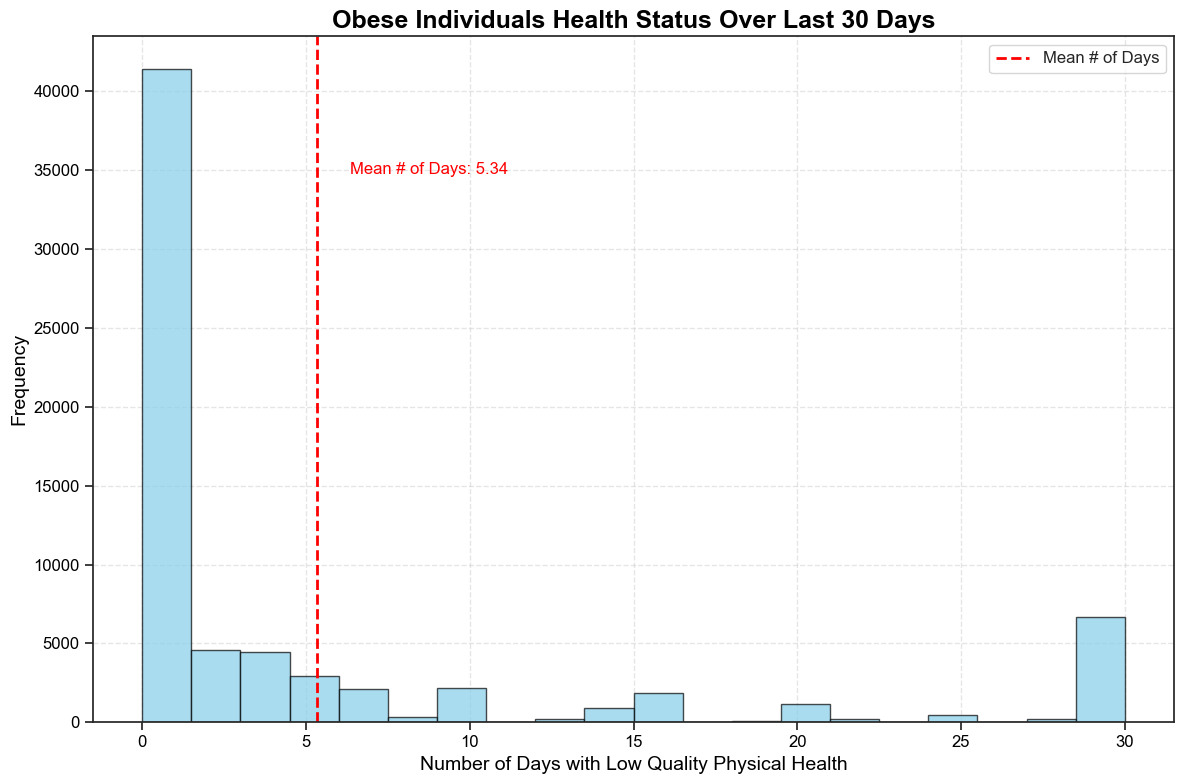

In [61]:
# Plotting Distributions for Physical Health Status

column_name = 'PHYSHLTH'

# Plot histogram
plt.figure(figsize=(12, 8))
plt.hist(df_obese[column_name], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Obese Individuals Health Status Over Last 30 Days', fontsize=18, fontweight='bold', color='black')
plt.xlabel('Number of Days with Low Quality Physical Health', fontsize=14, color='black')
plt.ylabel('Frequency', fontsize=14, color='black')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.axvline(df_obese[column_name].mean(), color='red', linestyle='--', linewidth=2, label='Mean # of Days')
plt.legend(fontsize=12)
plt.text(df_obese[column_name].mean() + 1, plt.gca().get_ylim()[1] * 0.8,
         f"Mean # of Days: {df_obese[column_name].mean():.2f}", fontsize=12, color='red')
plt.tight_layout()
plt.show()

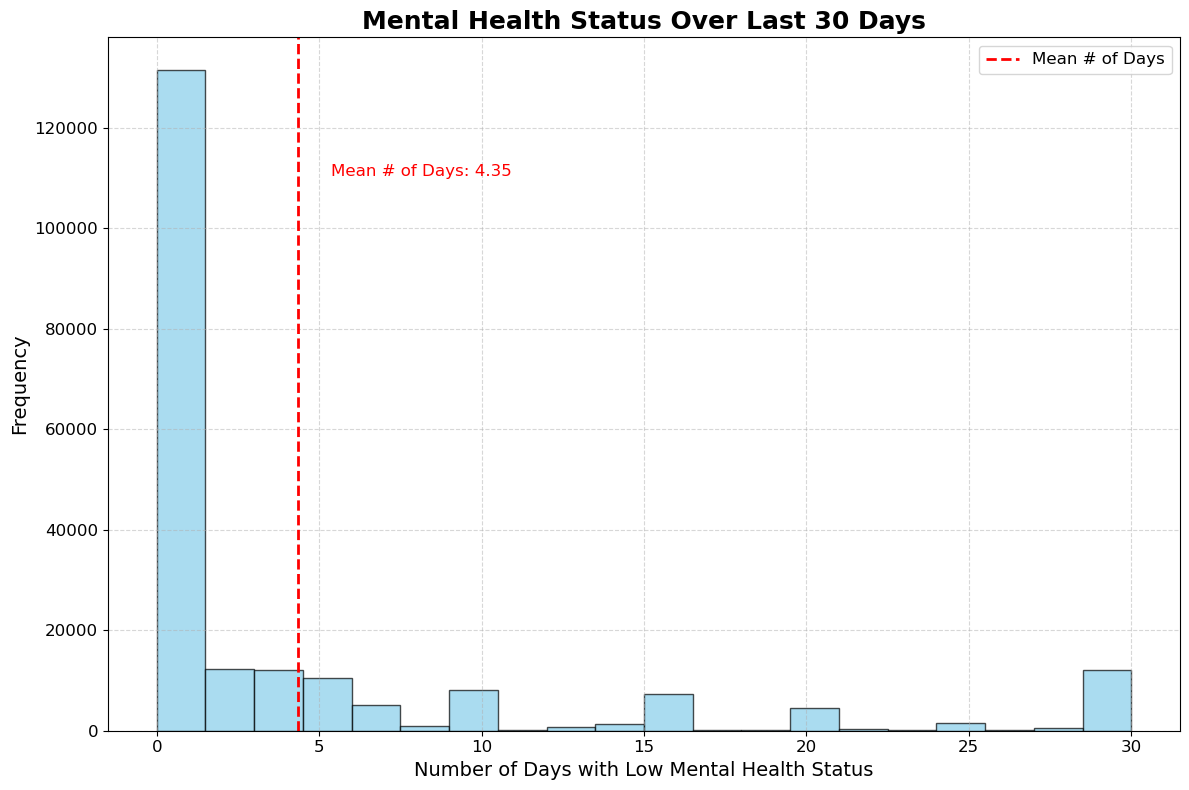

In [45]:
# Plotting Distributions for Mental Health Status

column_name = 'MENTHLTH'

# Plot histogram
plt.figure(figsize=(12, 8))
plt.hist(df_clean_train[column_name], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Mental Health Status Over Last 30 Days', fontsize=18, fontweight='bold', color='black')
plt.xlabel('Number of Days with Low Mental Health Status', fontsize=14, color='black')
plt.ylabel('Frequency', fontsize=14, color='black')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.axvline(df_clean_train[column_name].mean(), color='red', linestyle='--', linewidth=2, label='Mean # of Days')
plt.legend(fontsize=12)
plt.text(df_clean_train[column_name].mean() + 1, plt.gca().get_ylim()[1] * 0.8,
         f"Mean # of Days: {df_clean_train[column_name].mean():.2f}", fontsize=12, color='red')
plt.tight_layout()
plt.show()

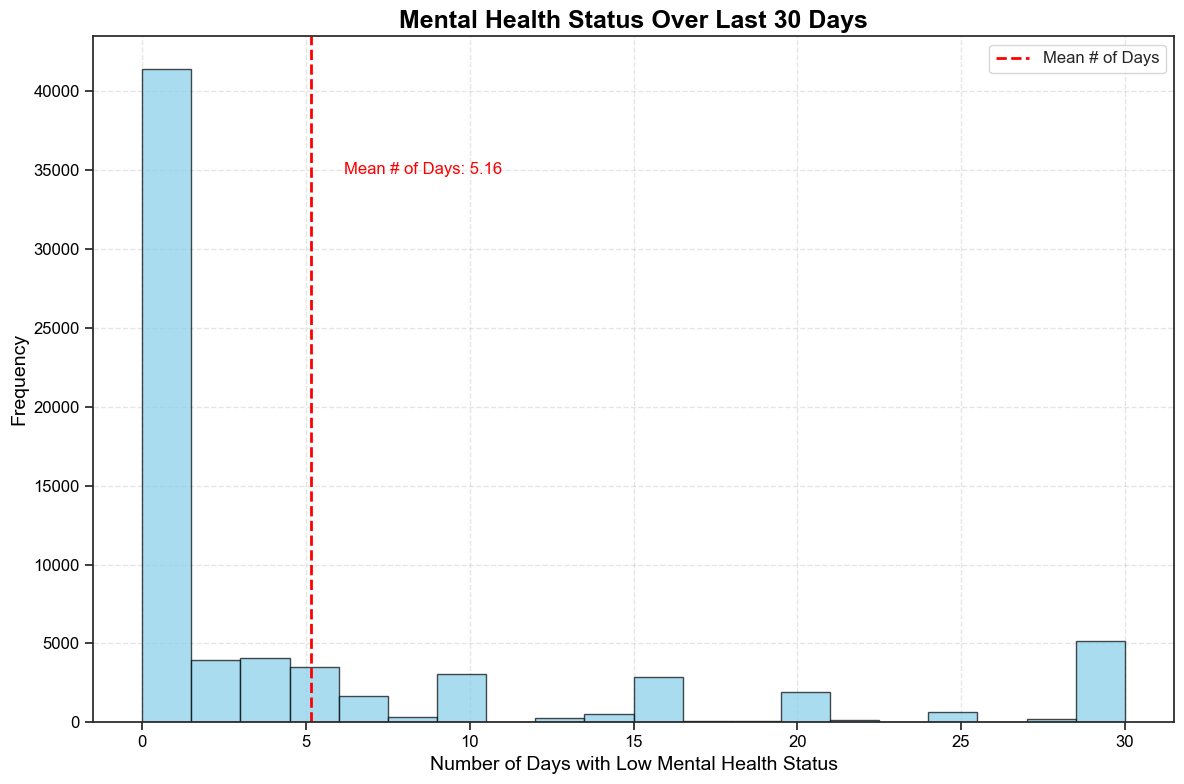

In [62]:
# Plotting Distributions for Mental Health Status

column_name = 'MENTHLTH'

# Plot histogram
plt.figure(figsize=(12, 8))
plt.hist(df_obese[column_name], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Mental Health Status Over Last 30 Days', fontsize=18, fontweight='bold', color='black')
plt.xlabel('Number of Days with Low Mental Health Status', fontsize=14, color='black')
plt.ylabel('Frequency', fontsize=14, color='black')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.axvline(df_obese[column_name].mean(), color='red', linestyle='--', linewidth=2, label='Mean # of Days')
plt.legend(fontsize=12)
plt.text(df_obese[column_name].mean() + 1, plt.gca().get_ylim()[1] * 0.8,
         f"Mean # of Days: {df_obese[column_name].mean():.2f}", fontsize=12, color='red')
plt.tight_layout()
plt.show()

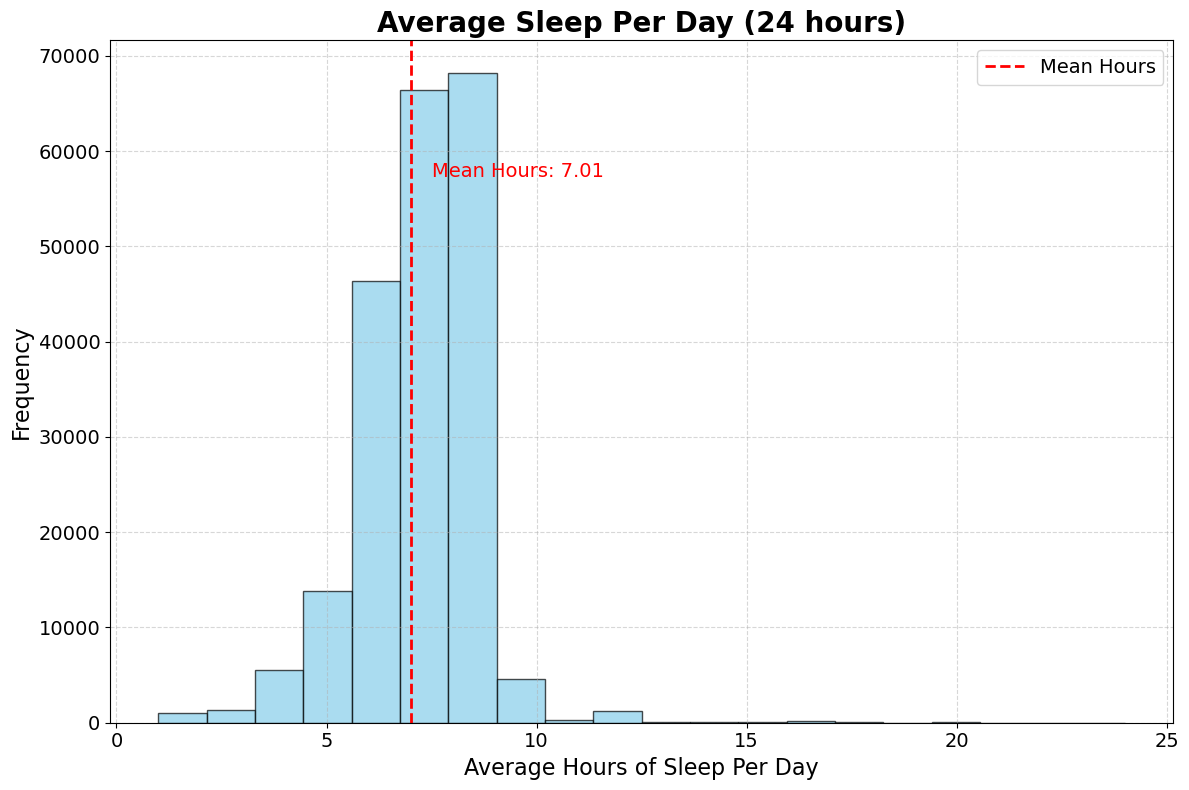

In [46]:
# Plotting Distribution for Average Sleep Time per day/ 24 hours
import matplotlib.pyplot as plt

column_name = 'SLEPTIM1'

# Plot histogram
plt.figure(figsize=(12, 8))
plt.hist(df_clean_train[column_name], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Average Sleep Per Day (24 hours)', fontsize=20, fontweight='bold', color='black')
plt.xlabel('Average Hours of Sleep Per Day', fontsize=16, color='black')
plt.ylabel('Frequency', fontsize=16, color='black')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=14, color='black')
plt.yticks(fontsize=14, color='black')
plt.axvline(df_clean_train[column_name].mean(), color='red', linestyle='--', linewidth=2, label='Mean Hours')
plt.legend(fontsize=14)
plt.text(df_clean_train[column_name].mean() + 0.5, plt.gca().get_ylim()[1] * 0.8,
         f"Mean Hours: {df_clean_train[column_name].mean():.2f}", fontsize=14, color='red')
plt.tight_layout()
plt.show()

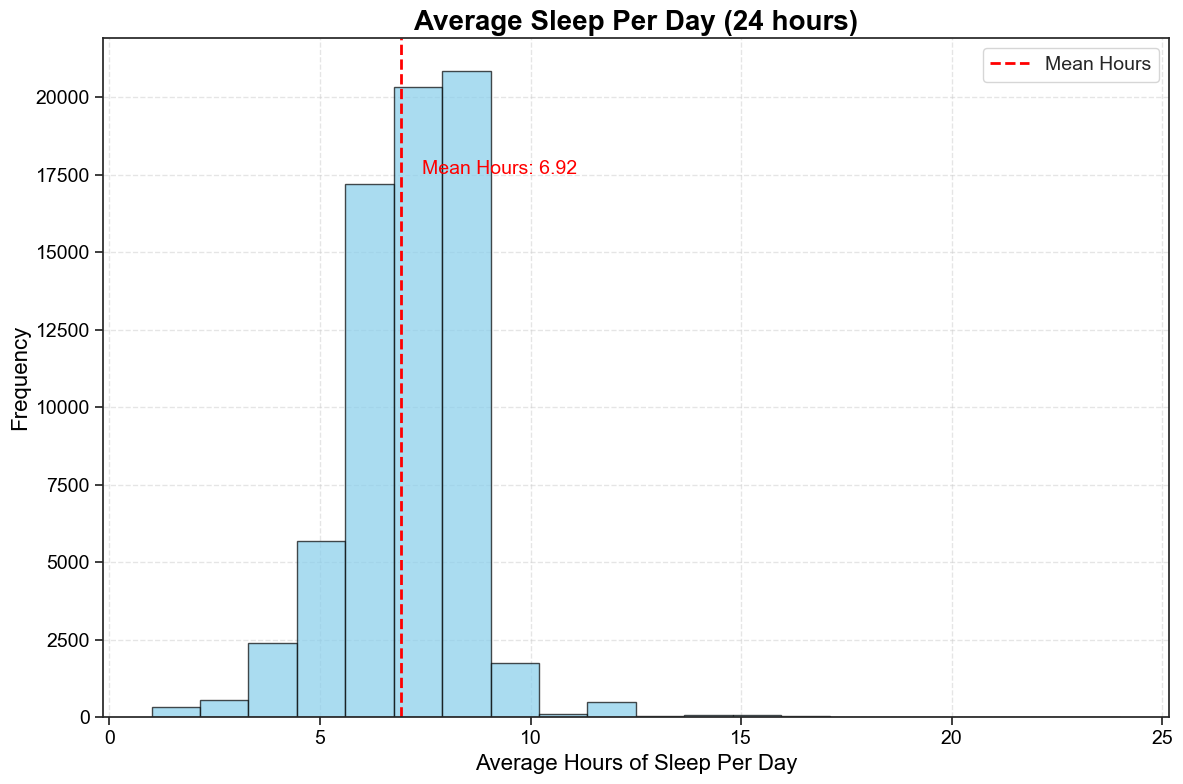

In [63]:
# Plotting Distribution for Average Sleep Time per day/ 24 hours
import matplotlib.pyplot as plt

column_name = 'SLEPTIM1'

# Plot histogram
plt.figure(figsize=(12, 8))
plt.hist(df_obese[column_name], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Average Sleep Per Day (24 hours)', fontsize=20, fontweight='bold', color='black')
plt.xlabel('Average Hours of Sleep Per Day', fontsize=16, color='black')
plt.ylabel('Frequency', fontsize=16, color='black')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=14, color='black')
plt.yticks(fontsize=14, color='black')
plt.axvline(df_obese[column_name].mean(), color='red', linestyle='--', linewidth=2, label='Mean Hours')
plt.legend(fontsize=14)
plt.text(df_obese[column_name].mean() + 0.5, plt.gca().get_ylim()[1] * 0.8,
         f"Mean Hours: {df_obese[column_name].mean():.2f}", fontsize=14, color='red')
plt.tight_layout()
plt.show()

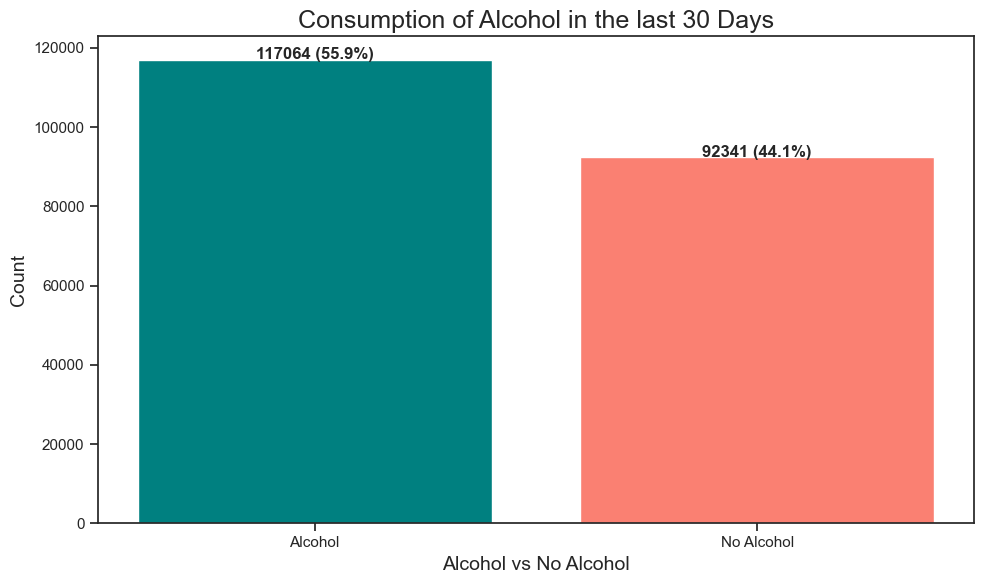

In [65]:
# Plotting visual for Alcohol use
outcome_counts_alc = df_clean_train['DRNKANY6'].value_counts()

# Calculate percentages
total = outcome_counts_alc.sum()
percentages = [count / total * 100 for count in outcome_counts_alc]

# Define colors and labels
colors = ['teal', 'salmon']
labels = ['Alcohol', 'No Alcohol']

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, outcome_counts_alc.values, color=colors)

# Adding text on top of each bar
for i, (count, percent) in enumerate(zip(outcome_counts_alc, percentages)):
    plt.text(i, count + 50, f"{count} ({percent:.1f}%)", ha='center', fontsize=12, fontweight='bold')

# Adding labels and title
plt.xlabel('Alcohol vs No Alcohol', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Consumption of Alcohol in the last 30 Days', fontsize=18)

# Display the plot
plt.tight_layout()
plt.show()

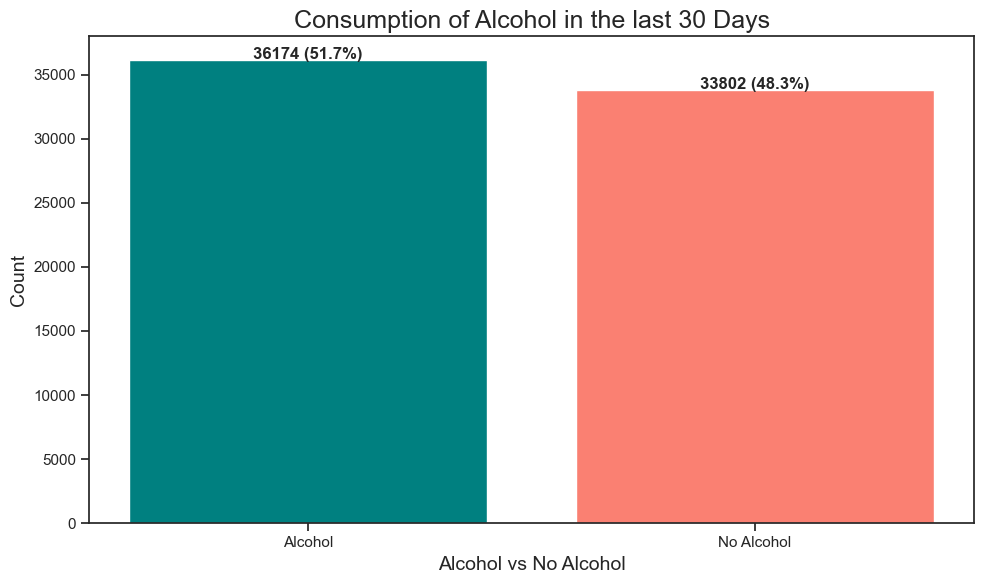

In [66]:
# Plotting visual for Alcohol use
outcome_counts_alc = df_obese['DRNKANY6'].value_counts()

# Calculate percentages
total = outcome_counts_alc.sum()
percentages = [count / total * 100 for count in outcome_counts_alc]

# Define colors and labels
colors = ['teal', 'salmon']
labels = ['Alcohol', 'No Alcohol']

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, outcome_counts_alc.values, color=colors)

# Adding text on top of each bar
for i, (count, percent) in enumerate(zip(outcome_counts_alc, percentages)):
    plt.text(i, count + 50, f"{count} ({percent:.1f}%)", ha='center', fontsize=12, fontweight='bold')

# Adding labels and title
plt.xlabel('Alcohol vs No Alcohol', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Consumption of Alcohol in the last 30 Days', fontsize=18)

# Display the plot
plt.tight_layout()
plt.show()

## Obesity Correlations

Obese         1.000000
BMI           0.773590
Overweight    0.490270
GENHLTH       0.214126
EXERANY2      0.131652
_TOTINDA      0.131652
_RFHLTH       0.130028
_PHYS14D      0.101124
PHYSHLTH      0.096320
MENTHLTH      0.069611
_MENT14D      0.062456
DRNKANY6      0.060046
_METSTAT      0.032709
_URBSTAT      0.025287
_CHLDCNT      0.025253
_IMPRACE      0.019933
_AGE_G        0.011891
_RACE1        0.011484
_STATE        0.011300
_RACEPR1      0.010491
_SEX         -0.001524
_AGE80       -0.004591
VETERAN3     -0.004695
_CURECI2     -0.005743
MARITAL      -0.008025
EMPLOY1      -0.008944
_SMOKER3     -0.009327
_HLTHPLN     -0.010705
_HISPANC     -0.012478
_RFBING6     -0.015571
PERSDOC3     -0.029227
_MICHD       -0.040786
SLEPTIM1     -0.044867
CHECKUP1     -0.050236
_INCOMG1     -0.062646
_EDUCAG      -0.076865
ADDEPEV3     -0.090618
_DRDXAR2     -0.113408
DIABETE4     -0.153603
Name: Obese, dtype: float64


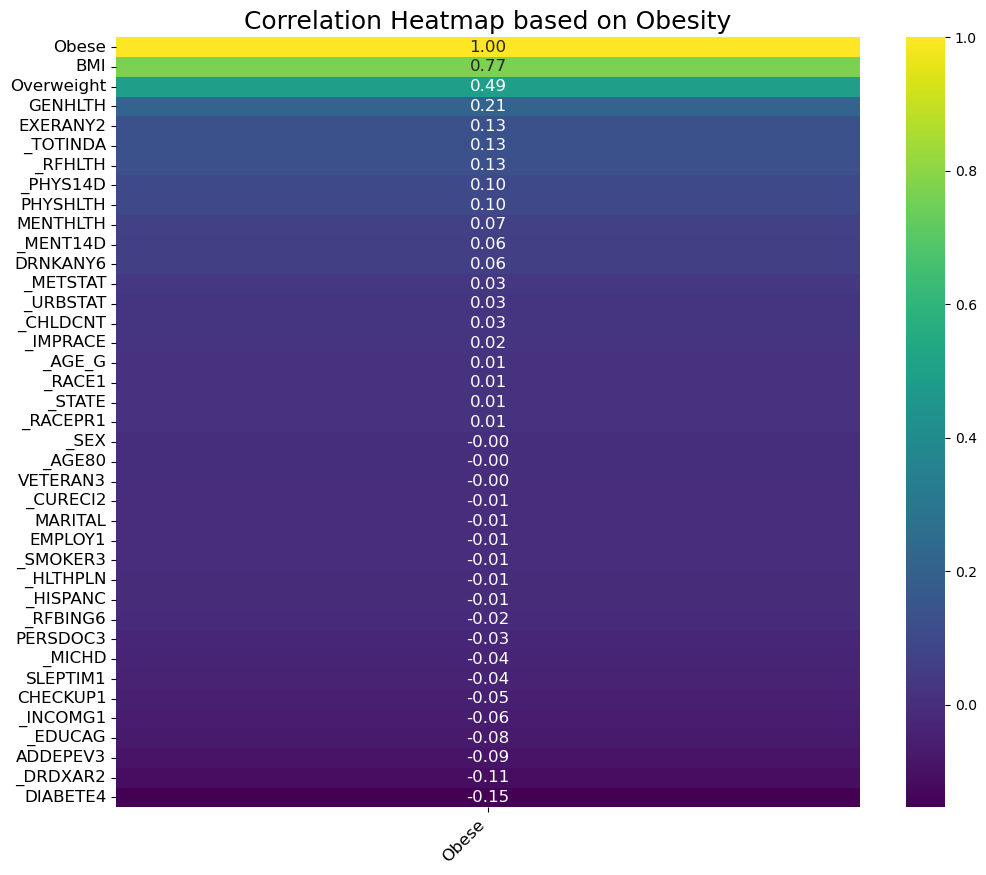

In [48]:
# Checking correlations between feature variables and  target variable Obesity 
print(df_clean_train.corr()["Obese"].sort_values(ascending=False))

# Heatmap showing correlations
plt.figure(figsize=(12, 10))
correlation_matrix = df_clean_train.corr()[['Obese']].sort_values(by='Obese', ascending=False)
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Heatmap based on Obesity', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()


The features that are the most positively correlated with obesity include:
- BMI           0.773590
- Overweight    0.490270
- GENHLTH       0.214126
- EXERANY2      0.131652
- _TOTINDA      0.131652
- _RFHLTH       0.130028
- _PHYS14D      0.101124
- PHYSHLTH      0.096320
- MENTHLTH      0.069611
- _MENT14D      0.062456

The features of BMI and overweight do make sense with having high correlations because both obesity and overweight status are classified through BMI values. 

General health status makes sense as obesity can increase co-morbidity risks for chronic diseases or poor health outcomes. 

Exercise being one of the top ones is logical because exercise can directly affect our health status and other health conditions. 

Highly correlated feature pairs and their correlation values:
('EXERANY2', '_TOTINDA', 1.0)
('_PHYS14D', 'PHYSHLTH', 0.8596432014671983)
('_MENT14D', 'MENTHLTH', 0.8662285848792133)
('_RFHLTH', 'GENHLTH', 0.7378124404978128)
('_HISPANC', '_RACE1', -0.8599423450794051)
('_HISPANC', '_IMPRACE', -0.7270138810714158)
('_HISPANC', '_RACEPR1', -0.8498126014274968)
('_RACE1', '_IMPRACE', 0.9664860594633732)
('_RACE1', '_RACEPR1', 0.9986511692436323)
('_AGE80', '_AGE_G', 0.9732856932793934)
('_IMPRACE', '_RACEPR1', 0.9702337880930768)
('Obese', 'BMI', 0.7735898242851831)


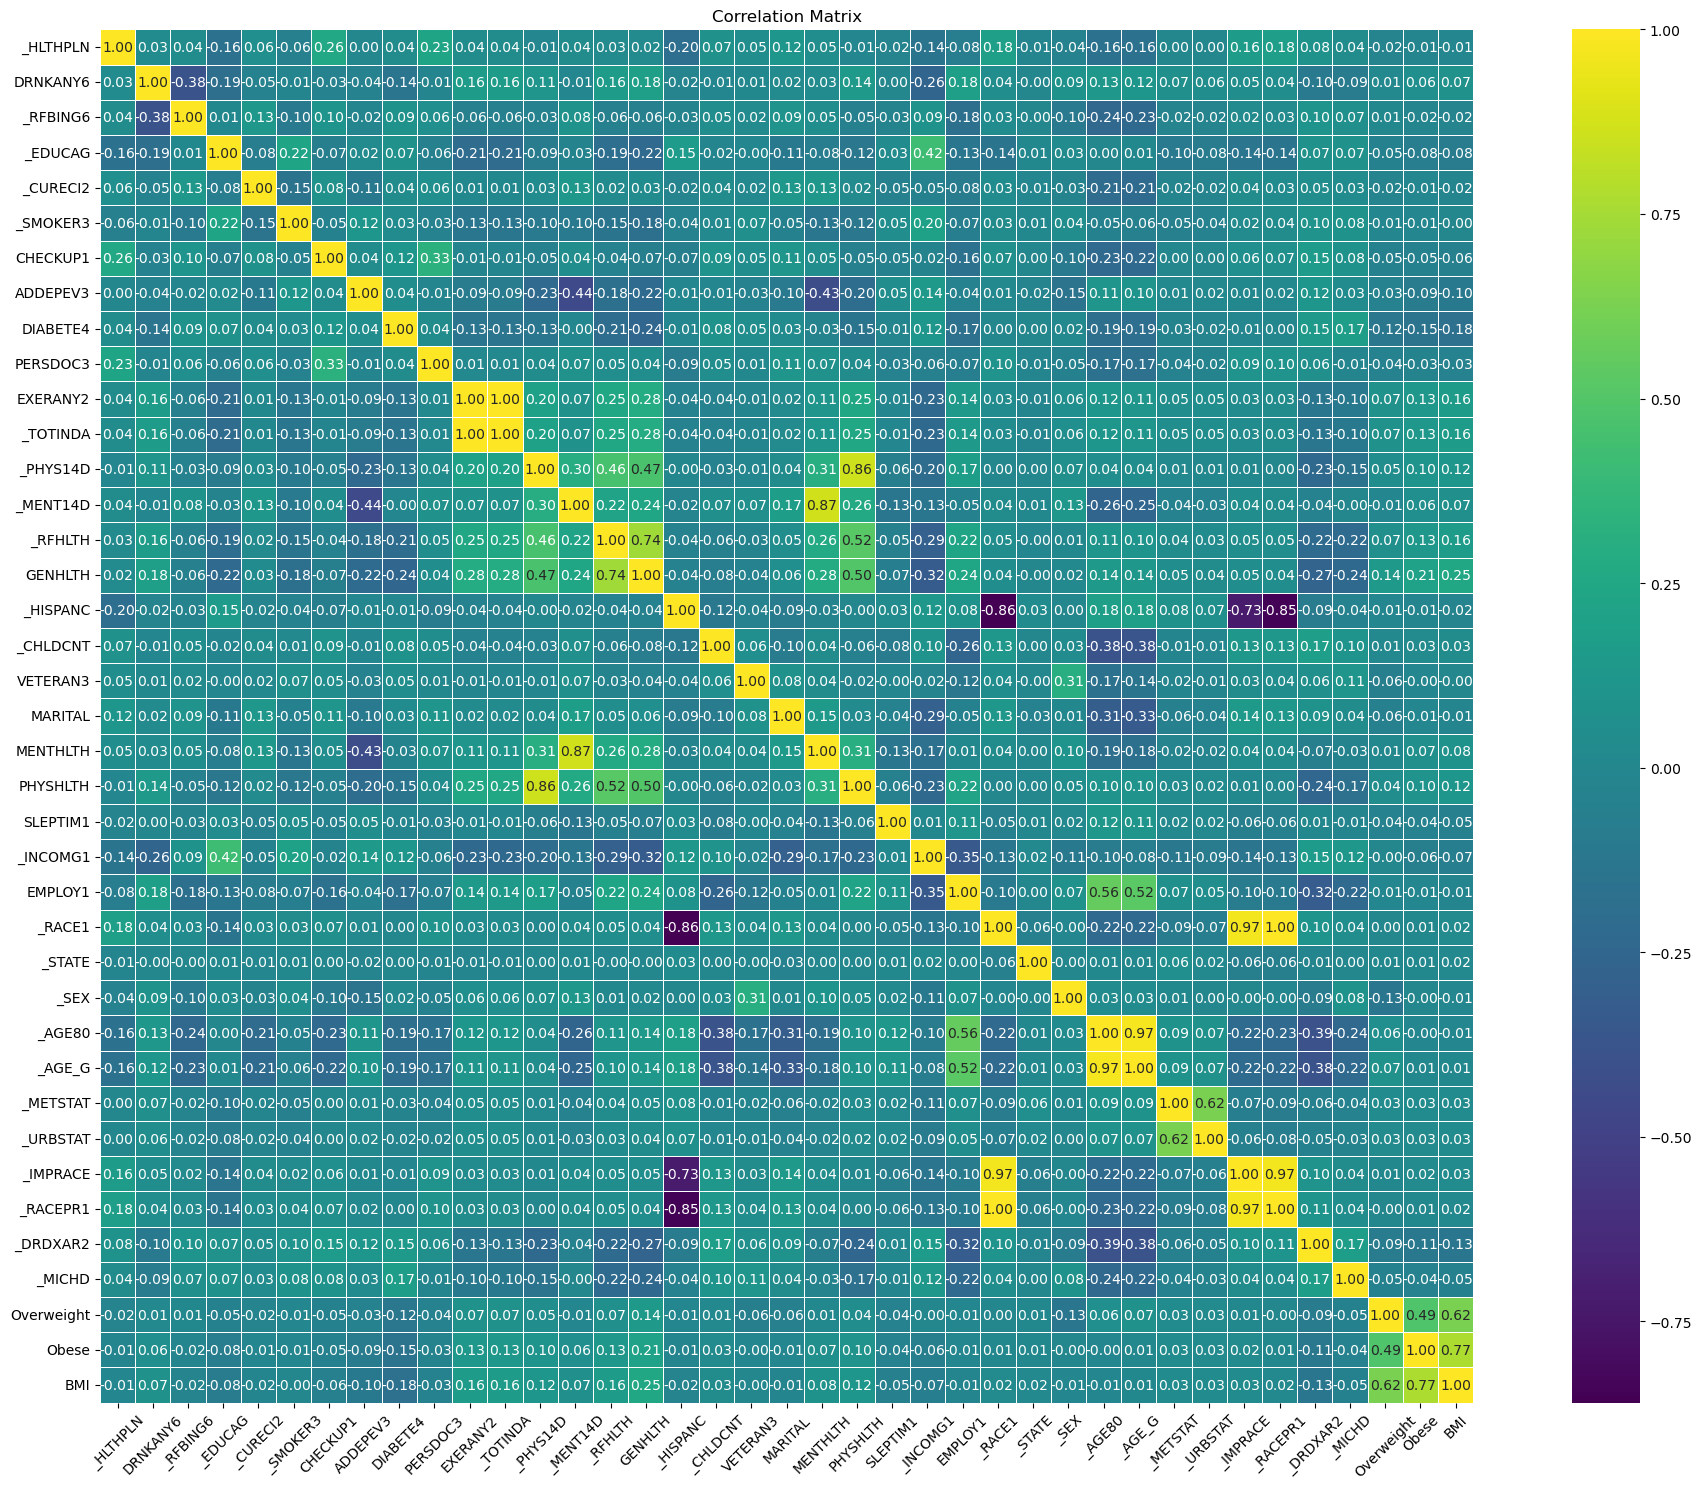

In [49]:
# Calculate correlation matrix
corr_matrix = df_clean_train.corr()

# Set the threshold for high correlation
threshold = 0.7  # You can adjust this threshold as needed

# Find pairs of highly correlated features
high_correlation_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_correlation_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Print highly correlated feature pairs with correlation values
if len(high_correlation_pairs) > 0:
    print("Highly correlated feature pairs and their correlation values:")
    for pair in high_correlation_pairs:
        print(pair)
else:
    print("No highly correlated feature pairs found.")

# Plot heatmap of correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, cmap='viridis', annot=True, fmt=".2f", cbar=True, square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

There are multiple features with high multicolinearity. To start, I set the threshold to 0.7 and plan to drop features from the feature pairs that are over 0.7. While BMI and obesity are over 0.7, both of these will remain. Since Obesity is classified based on BMI values, the BMI column will be dropped prior to modeling. 

### Dropping features with higher multicolinearity
                  

In [50]:
# Dropping features with higher multicolinearity
X_final_train = df_clean_train.drop(columns = [ '_MENT14D', '_PHYS14D', '_AGE80', '_RACE1', '_RACEPR1', 
                                    '_HISPANC', 'BMI', '_RFHLTH', 'EXERANY2'])

X_final_train.info()
                      

<class 'pandas.core.frame.DataFrame'>
Index: 209405 entries, 383796 to 36923
Data columns (total 30 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   _HLTHPLN    209405 non-null  float64
 1   DRNKANY6    209405 non-null  float64
 2   _RFBING6    209405 non-null  float64
 3   _EDUCAG     209405 non-null  float64
 4   _CURECI2    209405 non-null  float64
 5   _SMOKER3    209405 non-null  float64
 6   CHECKUP1    209405 non-null  float64
 7   ADDEPEV3    209405 non-null  float64
 8   DIABETE4    209405 non-null  float64
 9   PERSDOC3    209405 non-null  float64
 10  _TOTINDA    209405 non-null  float64
 11  GENHLTH     209405 non-null  float64
 12  _CHLDCNT    209405 non-null  float64
 13  VETERAN3    209405 non-null  float64
 14  MARITAL     209405 non-null  float64
 15  MENTHLTH    209405 non-null  float64
 16  PHYSHLTH    209405 non-null  float64
 17  SLEPTIM1    209405 non-null  float64
 18  _INCOMG1    209405 non-null  float64
 19  EMP

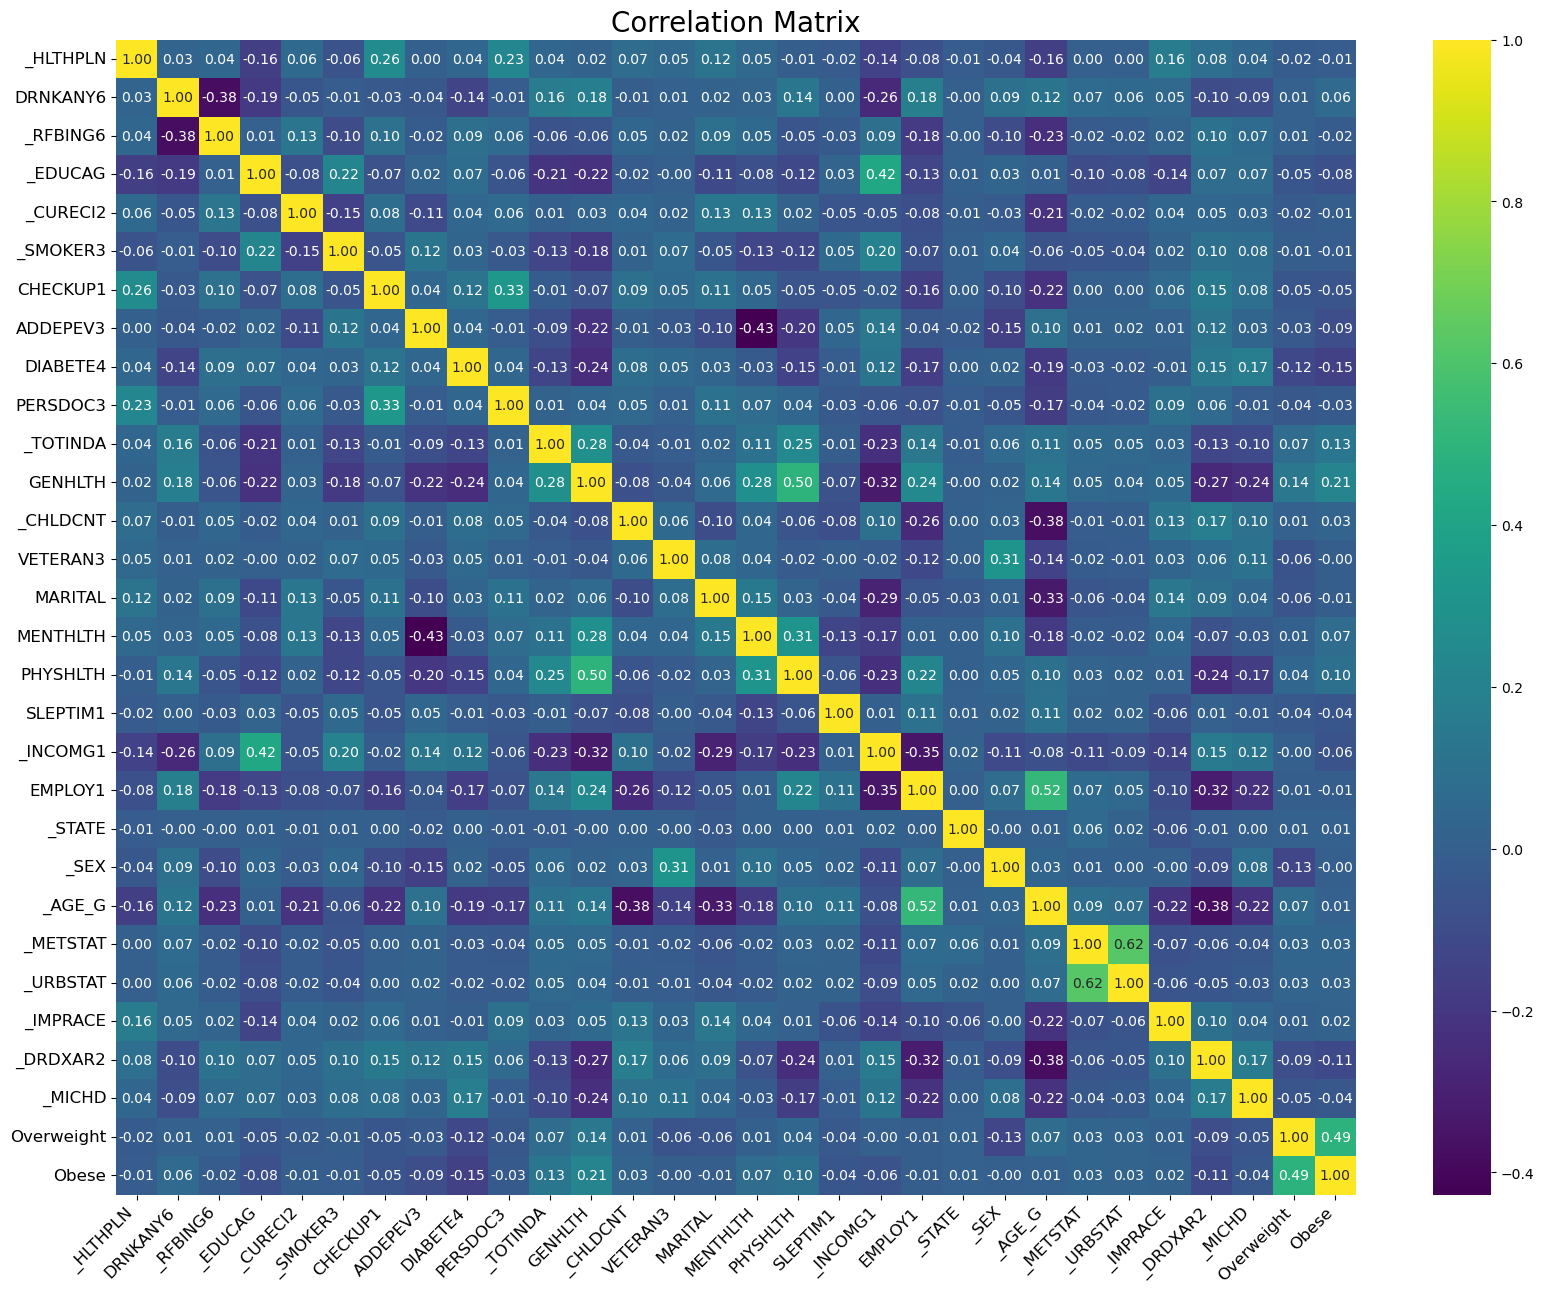

In [51]:
# Generating Correlation matrix for final training set
corr_matrix = X_final_train.corr()

# Set up figure and axis
fig, ax = plt.subplots(figsize=(20, 15))

# Plot heatmap
sns.heatmap(corr_matrix, cmap='viridis', annot=True, fmt=".2f", ax=ax)

# Set title and labels
ax.set_title('Correlation Matrix', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.show()

Obese         1.000000
Overweight    0.490270
GENHLTH       0.214126
_TOTINDA      0.131652
PHYSHLTH      0.096320
MENTHLTH      0.069611
DRNKANY6      0.060046
_METSTAT      0.032709
_URBSTAT      0.025287
_CHLDCNT      0.025253
_IMPRACE      0.019933
_AGE_G        0.011891
_STATE        0.011300
_SEX         -0.001524
VETERAN3     -0.004695
_CURECI2     -0.005743
MARITAL      -0.008025
EMPLOY1      -0.008944
_SMOKER3     -0.009327
_HLTHPLN     -0.010705
_RFBING6     -0.015571
PERSDOC3     -0.029227
_MICHD       -0.040786
SLEPTIM1     -0.044867
CHECKUP1     -0.050236
_INCOMG1     -0.062646
_EDUCAG      -0.076865
ADDEPEV3     -0.090618
_DRDXAR2     -0.113408
DIABETE4     -0.153603
Name: Obese, dtype: float64


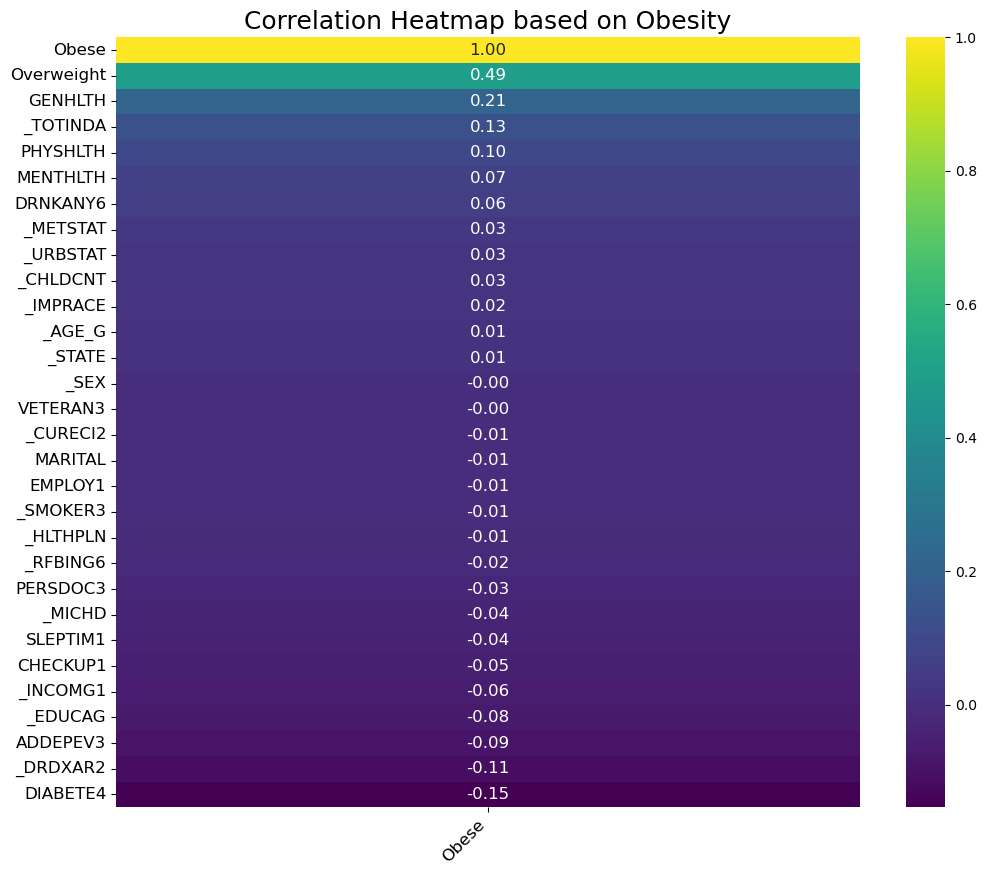

In [52]:
# Checking correlations between feature variables and  target variable Obesity with reduced final df
print(X_final_train.corr()["Obese"].sort_values(ascending=False))

# Heatmap showing correlations
plt.figure(figsize=(12, 10))
correlation_matrix = X_final_train.corr()[['Obese']].sort_values(by='Obese', ascending=False)
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Heatmap based on Obesity', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()


After dropping columns with high multicolinearity, the columes most correlated with obesity include:
- Overweight    0.490270
- GENHLTH       0.214126
- _TOTINDA      0.131652
- PHYSHLTH      0.096320
- MENTHLTH      0.069611
- DRNKANY6      0.060046
 

# Preparation for Modeling 

## Preprocessing Test Data

Now that the data has been visualized and assessed, I plan to began building the baseline predictive models. Prior to modeling, there will be some additional preprocessing steps needed to prepare for modeling. The training data has already been cleaned and preprocessed, however the test set will need to be preprocessed enough to be ran through the modeling process. I intentially kept the training and test sets separate for preprocessing to avoid any data leakage. 

In [33]:
# Concatenating x and y train for processesing
df_test = pd.concat([X_test, y_test], axis=1)
X_test = df_test.copy()

In [34]:
# checking for null and dropping duplicates
X_test.drop_duplicates(inplace=True)
print(X_test.isna().sum())
print(X_test.info())

_STATE            0
_SEX              0
_AGE80            0
_AGE_G            0
MARITAL           2
_EDUCAG           0
_INCOMG1          0
VETERAN3       1008
EMPLOY1        1490
_CHLDCNT          1
_METSTAT       2382
_URBSTAT       2382
_IMPRACE          0
_RACE1            0
_RACEPR1          0
_HISPANC          0
_BMI5         12261
GENHLTH           2
_RFHLTH           0
PHYSHLTH          1
_PHYS14D          0
MENTHLTH          2
_MENT14D          0
EXERANY2          1
_TOTINDA          0
SLEPTIM1          2
_HLTHPLN          0
PERSDOC3          1
CHECKUP1          1
ADDEPEV3          4
_DRDXAR2        652
_MICHD         1246
DIABETE4          1
_SMOKER3          0
_CURECI2          0
DRNKANY6          0
_RFBING6          0
Overweight        0
Obese             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 111281 entries, 299404 to 444681
Data columns (total 39 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   _STATE 

In [35]:
# Imputing missing values for numerical variable of _BMI
# Using train sets median to avoid computation of test set to maintain consistency and avoid data leakage
# Imputing missing values for numerical variables with median

train_median_bmi
numerical_cols = ['_BMI5']
for col in numerical_cols:
    median_val = train_median_bmi
    X_test[col].fillna(median_val, inplace=True)

# Dropping rest of Na Values as they are a very low percentage 
X_test = X_test.dropna().copy()

# Verify if there are any missing values remaining
missing_values = X_test.isnull().sum()
print("Remaining missing values:\n", missing_values[missing_values > 0])

print(X_test.isna().sum())

Remaining missing values:
 Series([], dtype: int64)
_STATE        0
_SEX          0
_AGE80        0
_AGE_G        0
MARITAL       0
_EDUCAG       0
_INCOMG1      0
VETERAN3      0
EMPLOY1       0
_CHLDCNT      0
_METSTAT      0
_URBSTAT      0
_IMPRACE      0
_RACE1        0
_RACEPR1      0
_HISPANC      0
_BMI5         0
GENHLTH       0
_RFHLTH       0
PHYSHLTH      0
_PHYS14D      0
MENTHLTH      0
_MENT14D      0
EXERANY2      0
_TOTINDA      0
SLEPTIM1      0
_HLTHPLN      0
PERSDOC3      0
CHECKUP1      0
ADDEPEV3      0
_DRDXAR2      0
_MICHD        0
DIABETE4      0
_SMOKER3      0
_CURECI2      0
DRNKANY6      0
_RFBING6      0
Overweight    0
Obese         0
dtype: int64


In [36]:
# Creating function to remove missing value placeholders
def remove_place_holders(X_test):

    X_test1 = X_test[['_HLTHPLN', 'DRNKANY6', '_RFBING6', '_EDUCAG',
                   '_CURECI2', '_SMOKER3', 'CHECKUP1', 'ADDEPEV3',
                   'DIABETE4', 'PERSDOC3', 'EXERANY2', '_TOTINDA', 
                    '_PHYS14D', '_MENT14D', '_RFHLTH', 'GENHLTH', 
                    '_HISPANC', '_CHLDCNT', 'VETERAN3', 'MARITAL']]


    X_test2 = X_test[['MENTHLTH', 'PHYSHLTH', 'SLEPTIM1']]



    X_test3 = X_test[['_INCOMG1', 'EMPLOY1', '_RACE1']]



    X_test4 = X_test.drop(columns = ['_INCOMG1', 'EMPLOY1', '_RACE1', 'MENTHLTH', 
                                   'PHYSHLTH', 'SLEPTIM1', '_HLTHPLN', 'DRNKANY6', 
                                   '_RFBING6', '_EDUCAG', '_CURECI2', '_SMOKER3', 
                                   'CHECKUP1', 'ADDEPEV3', 'DIABETE4', 'PERSDOC3', 
                                   'EXERANY2', '_TOTINDA', '_PHYS14D', '_MENT14D', 
                                   '_RFHLTH', 'GENHLTH', '_HISPANC', '_CHLDCNT', 
                                   'VETERAN3','MARITAL'], axis = 1)

    # Looping through columns to remove placeholder values 
    for col in X_test1.columns:
        X_test1 = X_test1[X_test1[col] != 7777.0]
        X_test1 = X_test1[X_test1[col] != 9999.0]
        X_test1 = X_test1[X_test1[col] != 77.0]
        X_test1 = X_test1[X_test1[col] != 99.0]
        X_test1 = X_test1[X_test1[col] != 9.0]
        X_test1 = X_test1[X_test1[col] != 7.0]
        X_test1 = X_test1[X_test1[col] != 9900.0]
    

    for col in X_test2.columns:
        X_test2 = X_test2[X_test2[col] != 77.0]
        X_test2 = X_test2[X_test2[col] != 99.0]


    for col in X_train3.columns:
        X_test3 = X_test3[X_test3[col] != 9.0]
 


    X_test_no_na = pd.concat([X_test1, X_test2, X_test3, X_test4], axis=1)
    X_test = X_test_no_na.copy()


    return X_test

In [37]:
# Removing placeholders with function
X_test = remove_place_holders(X_test)
X_test.info()


<class 'pandas.core.frame.DataFrame'>
Index: 105702 entries, 299404 to 237773
Data columns (total 39 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   _HLTHPLN    83826 non-null   float64
 1   DRNKANY6    83826 non-null   float64
 2   _RFBING6    83826 non-null   float64
 3   _EDUCAG     83826 non-null   float64
 4   _CURECI2    83826 non-null   float64
 5   _SMOKER3    83826 non-null   float64
 6   CHECKUP1    83826 non-null   float64
 7   ADDEPEV3    83826 non-null   float64
 8   DIABETE4    83826 non-null   float64
 9   PERSDOC3    83826 non-null   float64
 10  EXERANY2    83826 non-null   float64
 11  _TOTINDA    83826 non-null   float64
 12  _PHYS14D    83826 non-null   float64
 13  _MENT14D    83826 non-null   float64
 14  _RFHLTH     83826 non-null   float64
 15  GENHLTH     83826 non-null   float64
 16  _HISPANC    83826 non-null   float64
 17  _CHLDCNT    83826 non-null   float64
 18  VETERAN3    83826 non-null   float64
 19  MA

In [38]:
# Drop rows with NaNs in the specified columns
X_test.dropna(inplace=True)

# Creating Adjusted BMI column rounded to two decimal places
X_test['BMI'] = round(X_test['_BMI5'] * 0.01, 2)
# 88 is labeled a 0 days planning to replace all rows with values of 88 to 0
# Replacing placeholder values with NaN
placeholders = [88.0]
for col in X_test[['MENTHLTH', 'PHYSHLTH']]:
    X_test[col].replace(placeholders, 0 , inplace=True)

X_test = X_test.drop(columns = ['_BMI5'])

# Creating final clean train dataset
X_test_clean = X_test.copy()

# Dropping highly correlated columns
X_final_test = X_test_clean.drop(columns = [ '_MENT14D', '_PHYS14D', '_AGE80', '_RACE1', '_RACEPR1', 
                                    '_HISPANC', 'BMI', '_RFHLTH', 'EXERANY2'])
X_final_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69638 entries, 299404 to 132307
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   _HLTHPLN    69638 non-null  float64
 1   DRNKANY6    69638 non-null  float64
 2   _RFBING6    69638 non-null  float64
 3   _EDUCAG     69638 non-null  float64
 4   _CURECI2    69638 non-null  float64
 5   _SMOKER3    69638 non-null  float64
 6   CHECKUP1    69638 non-null  float64
 7   ADDEPEV3    69638 non-null  float64
 8   DIABETE4    69638 non-null  float64
 9   PERSDOC3    69638 non-null  float64
 10  _TOTINDA    69638 non-null  float64
 11  GENHLTH     69638 non-null  float64
 12  _CHLDCNT    69638 non-null  float64
 13  VETERAN3    69638 non-null  float64
 14  MARITAL     69638 non-null  float64
 15  MENTHLTH    69638 non-null  float64
 16  PHYSHLTH    69638 non-null  float64
 17  SLEPTIM1    69638 non-null  float64
 18  _INCOMG1    69638 non-null  float64
 19  EMPLOY1     69638 non-nu

The final test set contains 66759 entries and 30 columns.

# Modeling 

I plan to start with a basic Logistic Regression Model to establish a baseline model. From there based on performance, parameter tuning will be implemented as needed and additional modeling utilizing Decision Tree Classifiers and Random Forest Models will be experimented with for comparison. Then I plan to utilize simple Nerual Network models to compare and adjust to find the overall best performing model. Metrics of evaluation will be both the Accuracy of the model and its overall F1- Score. 

In [39]:
# Separate features and target variable
# Leaving overweight variable in, may adjust and remove depending in performance
X_train = X_final_train.drop(['Obese'], axis=1)
y_train = X_final_train['Obese']

X_test = X_final_test.drop(['Obese'], axis=1)
y_test = X_final_test['Obese']


In [41]:
# Initiating the scaler
scaler = StandardScaler()

# Transform the training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Using Smote to address class imbalance with target variable 
sm = SMOTE(random_state=42)
X_train_resample, y_train_resample = sm.fit_resample(X_train_scaled, y_train)

# Convert into a DataFrame 
scaled_data = pd.DataFrame(X_train_scaled, columns= X_train.columns)
scaled_data.head()


,_HLTHPLN,DRNKANY6,_RFBING6,_EDUCAG,_CURECI2,_SMOKER3,CHECKUP1,ADDEPEV3,DIABETE4,PERSDOC3,_TOTINDA,GENHLTH,_CHLDCNT,VETERAN3,MARITAL,MENTHLTH,PHYSHLTH,SLEPTIM1,_INCOMG1,EMPLOY1,_STATE,_SEX,_AGE_G,_METSTAT,_URBSTAT,_IMPRACE,_DRDXAR2,_MICHD,Overweight
0,-0.220973,-0.888149,-0.429633,0.934835,-0.236926,0.673035,-0.417806,0.527979,0.362293,0.651061,-0.530582,1.442233,-0.512744,0.380866,-0.753909,-0.164878,-0.495554,-0.008643,0.291397,-0.915925,1.325719,0.958195,-0.240222,-0.615665,-0.383451,0.277753,-1.379901,0.311926,0.692049
1,-0.220973,-0.888149,-0.429633,0.934835,-0.236926,0.673035,0.695080,0.527979,0.362293,-0.790772,-0.530582,-0.505614,-0.512744,0.380866,-0.753909,-0.530448,-0.495554,0.691760,0.924856,1.190864,1.453370,0.958195,1.031518,-0.615665,-0.383451,-0.457703,-1.379901,0.311926,-1.444983
2,-0.220973,-0.888149,-0.429633,0.934835,-0.236926,0.673035,-0.417806,0.527979,0.362293,-0.790772,-0.530582,0.468309,1.514790,0.380866,-0.753909,-0.530448,-0.495554,-1.409448,1.558316,-0.915925,0.559813,-1.043629,-0.240222,-0.615665,-0.383451,3.219576,0.724690,0.311926,0.692049
3,-0.220973,-0.888149,-0.429633,0.934835,-0.236926,0.673035,0.695080,0.527979,0.362293,-0.790772,-0.530582,-0.505614,2.528557,0.380866,-0.753909,0.688119,-0.495554,-0.008643,1.558316,-0.915925,1.453370,-1.043629,-0.876092,-0.615665,-0.383451,-0.457703,0.724690,0.311926,-1.444983
4,-0.220973,-0.888149,-0.429633,-1.254717,4.220719,-2.628961,2.920851,0.527979,0.362293,2.092893,-0.530582,0.468309,3.542323,0.380866,1.622380,3.125253,-0.258844,-1.409448,-1.608982,-0.915925,1.581021,-1.043629,-0.876092,-0.615665,-0.383451,-0.457703,-1.379901,0.311926,0.692049


To increase processing speeds and reduce computational load, I plan to use a smaller subset (25%) of the training data for model training. Once the the most performant model is found, then I plan to train on the whole training set for comparison.  

In [42]:
# Set the seed for reproducibility
np.random.seed(42)

# Define the percentage of the original training set to use
percentage_to_use = 0.25 

# Split the original training set into a smaller subset
sample_train_X, _, sample_train_y, _ = train_test_split(
    X_train_resample, y_train_resample, 
    train_size= percentage_to_use, 
    stratify= y_train_resample,  # Maintain class distribution
    random_state=42   
)

# Print the shape of the new subset
print("Sample Train X Shape:", sample_train_X.shape)
print("Sample Train Y Shape:", sample_train_y.shape)

Sample Train X Shape: (69714, 29)
Sample Train Y Shape: (69714,)


In [43]:
# Creating function to take in model and data to generate evaluation score metrics
def model_scores(model, X_train, X_test, y_train, y_test):
    
    train_score = model.score(X_train, y_train)
    y_pred_train = model.predict(X_train)
    
    test_score = model.score(X_test, y_test)
    y_pred_test = model.predict(X_test)
    
  
    print("Model's Train Score:", train_score)
    print("---------------------------------")
    print("Model's Test Score:", test_score)
    print("---------------------------------")
    print("Cross Validation Scores:", cross_val_score(model, X_train, y_train))
    print("---------------------------------")
    print("Model's Accuracy Score:", accuracy_score(y_test, y_pred_test))
    print("---------------------------------")
    print("Model's Precision Score:", precision_score(y_test, y_pred_test))
    print("---------------------------------")
    print("Model's F1 Score:", f1_score(y_test, y_pred_test))
    print("---------------------------------")
    print("Model's Recall Score:", recall_score(y_test, y_pred_test))

## Baseline Logistic Regression Model 

In [44]:
#Instantiate the model 
logreg_model = LogisticRegression(random_state = 42)

# Fit the model to the data
logreg_model.fit(sample_train_X, sample_train_y) 

# Making predictions 
y_base_pred= logreg_model.predict(X_test_scaled)

# Baseline test score 
logreg_score = logreg_model.score(X_test_scaled, y_test)

# Baseline test score 
logreg_train_score = logreg_model.score(sample_train_X, sample_train_y)

# Cross Validation
logreg_cv = cross_val_score(logreg_model, sample_train_X, sample_train_y)


print("Logistic Regression Training Score:", logreg_train_score)
print("Logistic Regression Test Score:", logreg_score)
print("Cross Validation Scores:", logreg_cv)


# Classification report for confusion matrix 
logreg_report = classification_report(y_test, y_base_pred)
print(logreg_report)

# Checking classification metrics
model_scores(logreg_model, sample_train_X, X_test_scaled, sample_train_y, y_test)


Logistic Regression Training Score: 0.7555153914565224
Logistic Regression Test Score: 0.6993164651483386
Cross Validation Scores: [0.75442875 0.74890626 0.76138564 0.75371154 0.7559891 ]
              precision    recall  f1-score   support

           0       0.94      0.59      0.72     46402
           1       0.53      0.92      0.67     23236

    accuracy                           0.70     69638
   macro avg       0.73      0.76      0.70     69638
weighted avg       0.80      0.70      0.71     69638

Model's Train Score: 0.7555153914565224
---------------------------------
Model's Test Score: 0.6993164651483386
---------------------------------
Cross Validation Scores: [0.75442875 0.74890626 0.76138564 0.75371154 0.7559891 ]
---------------------------------
Model's Accuracy Score: 0.6993164651483386
---------------------------------
Model's Precision Score: 0.5283028167278642
---------------------------------
Model's F1 Score: 0.6718796521194077
------------------------------

Baseline Model Evaluation

The initial baseline model was a simple Logistic Regression model used to predict the target variable, presence of Obesity, based on the the independent variables/ features, various lifestyle and health metrics.

Metrics used to assess the model included:

- Accuracy: 0.6993164651483386
- Precision: 0.5283028167278642
- F1 Score: 0.6718796521194077
- Recall: 0.9226200723016009


One thing to note about the metrics is that while all metrics give us an idea of how the model performs, certain ones will be more valuable to focus on depending on the business problem and stakeholder. While I will be generating all of these metrics for each model, I will be focusing more so on accuracy, recall and F1 score as evaluation metrics. Accuracy was chosen because the goal is to accurately classify or predict obesity based on the model and the features. I chose recall because as a treatment measure, I find that having a higher recall in this case is warranted as well because this represents the number of correctly classified obese individuals out of all who have obesity. F1 Score was also chosen because it is a combination of both recall and precision which results to give a well-rounded score of how the model is performing. Generally if F1 is higher, then the model is doing better all around.

Regarding recall, since recall is the score of the # of true positives over the number of actual positives, this would increase chances of correctly identifying the individuals with higher risk/chance of Obesity. Recall does have its limitations in that there may be an increase in number of false positives, however with obesity, I find it fair to lean more towards correctly over identifying obesity/ obesity risk than to underidentify. Generally alot of lifestyle and health improvement interventions that are geared towards obesity would not be harmful or detrimental to those who may be a false positive and labeled as higher risk of obesity. 


So looking at the baseline model, the recall score was 0.923. Having a recall of 0.923 means that out of all the individuals who are classified as obese, the model was able to correctly identify 92.3% of them.

Regarding the baseline model, we can also look at both the training and test scores. At baseline both of these scores are not showing exceptional performance which means there is room for improvement. The model's training score is slightly higher than the test score indicating a slight overfitting but not excessive. 

- Model's Train Score: 0.7555153914565224
- Model's Test Score:  0.6993164651483386

## Decision Tree Classifier 

In [45]:
# Training on sample sets of data 
# Decision tree model classifier 
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the classifier 
dt_classifier.fit(sample_train_X, sample_train_y)

# Make predictions for test data
y_tree_pred = dt_classifier.predict(X_test_scaled)

# Scoring on trained data
dt_train_score = dt_classifier.score(sample_train_X, sample_train_y)

# Scoring on test data
dt_test_score = dt_classifier.score(X_test_scaled, y_test)

# Cross validating model
dt_cv = cross_val_score(dt_classifier, sample_train_X, sample_train_y)


print("Decision Tree Training Score:", dt_train_score)
print("Decision Tree  Test Score:", dt_test_score)
print("Cross Validation Scores:", dt_cv)


# Classification report 
dt_report = classification_report(y_test, y_tree_pred)
print(dt_report)

# Checking classification metrics
model_scores(dt_classifier, sample_train_X, X_test_scaled, sample_train_y, y_test)

Decision Tree Training Score: 0.9998852454313337
Decision Tree  Test Score: 0.6894224417702979
Cross Validation Scores: [0.74919314 0.74783045 0.75686725 0.74897798 0.74637785]
              precision    recall  f1-score   support

           0       0.77      0.76      0.77     46402
           1       0.53      0.55      0.54     23236

    accuracy                           0.69     69638
   macro avg       0.65      0.65      0.65     69638
weighted avg       0.69      0.69      0.69     69638

Model's Train Score: 0.9998852454313337
---------------------------------
Model's Test Score: 0.6894224417702979
---------------------------------
Cross Validation Scores: [0.74919314 0.74783045 0.75686725 0.74897798 0.74637785]
---------------------------------
Model's Accuracy Score: 0.6894224417702979
---------------------------------
Model's Precision Score: 0.5334972085659528
---------------------------------
Model's F1 Score: 0.5421482704602226
---------------------------------
Model's

### Decision Tree Model Evaluation

The second model was a simple Decision Tree Classifier model. The model's performance metrics were:

- Accuracy: 0.6894224417702979
- Precision: 0.5334972085659528
- F1 Score: 0.5421482704602226
- Recall:  0.5510845240144603


Looking at the metrics, this model performed worse in each metric with the exception of precision when compared to the logistic regression model. Recall and F1 were much lower compared to the logistic regression model. Accuracy was only slightly lower.

Looking at the training and test scores, the model performed much better on training set than on the test set indicating that the model is overfitting the data. 

- Train Score: 0.9998852454313337

- Test Score: 0.6894224417702979


## KNN Model

In [46]:
# Instantiate KNN Model 
knn = KNeighborsClassifier()

knn.fit(sample_train_X, sample_train_y)
knn_y_pred = knn.predict(X_test_scaled)

# Knn Train Model Score
knn_train_score = knn.score(sample_train_X, sample_train_y)

# Knn Test Model Score
knn_test_score = knn.score(X_test_scaled, y_test)


# Cross validating model
knn_cv = cross_val_score(knn, sample_train_X, sample_train_y)


print("KNN Training Score:", knn_train_score)
print("KNN Test Score:", knn_test_score)
print("Cross Validation Scores:", knn_cv)


# Classification report 
knn_report = classification_report(y_test, knn_y_pred)
print(knn_report)

# Checking classification metrics
model_scores(knn, sample_train_X, X_test_scaled, sample_train_y, y_test)

KNN Training Score: 0.8136385804859856
KNN Test Score: 0.6700221143628479
Cross Validation Scores: [0.72366062 0.71849674 0.72509503 0.71577135 0.72428633]
              precision    recall  f1-score   support

           0       0.86      0.61      0.71     46402
           1       0.50      0.80      0.62     23236

    accuracy                           0.67     69638
   macro avg       0.68      0.70      0.66     69638
weighted avg       0.74      0.67      0.68     69638

Model's Train Score: 0.8136385804859856
---------------------------------
Model's Test Score: 0.6700221143628479
---------------------------------
Cross Validation Scores: [0.72366062 0.71849674 0.72509503 0.71577135 0.72428633]
---------------------------------
Model's Accuracy Score: 0.6700221143628479
---------------------------------
Model's Precision Score: 0.5035020303600142
---------------------------------
Model's F1 Score: 0.6165629328038178
---------------------------------
Model's Recall Score: 0.7951

### KNN Model Evaluation
The third model was a K-Nearest Neighbors model. The model's performance metrics were:


- Accuracy Score: 0.6700221143628479
- Precision Score: 0.5073598066677651
- F1 Score: 0.6194467728415758
- Recall Score: 0.7951024272680324


Looking at the metrics, this model performed worse in accuracy and precision compared to the logistic regression and decision tree model. Recall was lower on this model compared to the logistic regression but higher than the decision tree model. F1 score was lower compared to logistic regression model and higher than the decision tree model.

Looking at the training and test scores, the model performed better on training set than on the test set indicating that the model is  overfitting the data. 

- Train Score: 0.8136385804859856
- Test Score: 0.6700221143628479

## Random Forest Classifier 

In [47]:
# Random forest classifier model

rfc = RandomForestClassifier(random_state=42)
rfc.fit(sample_train_X, sample_train_y)

# Getting test predictions
y_rfc_pred = rfc.predict(X_test_scaled)

# Random Forest Train Model Score
rfc_train_score = rfc.score(sample_train_X, sample_train_y)

# Random Forest Test Model Score
rfc_test_score = rfc.score(X_test_scaled, y_test)

# Cross validating model
rfc_cv = cross_val_score(rfc, sample_train_X, sample_train_y)


print("Random Forest Training Score:", rfc_train_score)
print("Random Forest Test Score:", rfc_test_score)
print("Cross Validation Scores:", rfc_cv)

# Classification report 
rfc_report = classification_report(y_test, y_rfc_pred)
print(rfc_report)

# Checking classification metrics
model_scores(rfc, sample_train_X, X_test_scaled, sample_train_y, y_test)

Random Forest Training Score: 0.9998852454313337
Random Forest Test Score: 0.7370544817484707
Cross Validation Scores: [0.80076024 0.79875206 0.80786058 0.80420283 0.80512122]
              precision    recall  f1-score   support

           0       0.83      0.76      0.79     46402
           1       0.59      0.68      0.63     23236

    accuracy                           0.74     69638
   macro avg       0.71      0.72      0.71     69638
weighted avg       0.75      0.74      0.74     69638

Model's Train Score: 0.9998852454313337
---------------------------------
Model's Test Score: 0.7370544817484707
---------------------------------
Cross Validation Scores: [0.80076024 0.79875206 0.80786058 0.80420283 0.80512122]
---------------------------------
Model's Accuracy Score: 0.7370544817484707
---------------------------------
Model's Precision Score: 0.5919289207451376
---------------------------------
Model's F1 Score: 0.6339483837434781
---------------------------------
Model's 

### Random Forest Model Evaluation
The fourth model was a Random Forest model. The model's performance metrics were:

- Accuracy Score: 0.7370544817484707
- Precision Score: 0.5919289207451376
- F1 Score: 0.6339483837434781
- Recall Score:  0.682389395765192

Looking at the metrics, this model has the highest accuracy score and highest precision score of all the models so far. Recall was lower on this model compared to logistic regression and knn models but higher than the decision tree model. F1 score was slightly lower compared to logistic regression model but higher than the rest of the other models.

Looking at the training and test scores, the model performed better on training set than on the test set indicating that the model is overfitting data.

- Train Score: 0.9998852454313337
- Test Score: 0.7370544817484707

## Hyperparameter Tuning

I plan to take both the baseline logistic regression model and random forest model and perfrom a grid search to find the optimal parameters to tune to see if perfomance can be improved. 

### Logistic Regression Tuning

In [48]:
# Utilizing GridSearch to find best combination of parameters
# Define hyperparameter grid, looking at regularization strength, regularization type and solver options
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
    'max_iter': [1, 2, 3, 4, 5],
    'class_weight': [None, 'balanced'],
    'dual': [True, False],  # Only applicable for 'liblinear'
    'tol': [1e-4, 1e-3, 1e-2],  
    'warm_start': [True, False],  # Applicable for 'liblinear', 'lbfgs', and 'newton-cg'
    'intercept_scaling': [1, 2, 3]  # Only applicable for 'sag' and 'saga'
}

# Create a GridSearchCV object
grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to data
grid_search.fit(sample_train_X, sample_train_y) 


# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Get the best estimator (model with the best hyperparameters)
best_log_reg = grid_search.best_estimator_

# Using tuned model for predictions
y_grid_pred = best_log_reg.predict(X_test_scaled) 


Best Hyperparameters:  {'C': 0.001, 'class_weight': None, 'dual': True, 'intercept_scaling': 2, 'max_iter': 1, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001, 'warm_start': True}
Best Score:  0.7566629542274464


### Best Logistic Regression Model

In [69]:
#Instantiate the model with tuned hyperparameters
tuned_logreg_model = LogisticRegression(random_state = 42, 
                                        C = 0.001, 
                                        penalty = 'l2',
                                        solver = 'liblinear', 
                                        max_iter = 1,
                                        class_weight= None, 
                                        dual = True, 
                                        intercept_scaling = 2, 
                                        tol = 0.0001, 
                                        warm_start = True 
                                       
                                       )

# Fit the model to the data
tunelg_model = tuned_logreg_model.fit(sample_train_X, sample_train_y) 

# Making predictions 
y_base_tuned_pred= tuned_logreg_model.predict(X_test_scaled)

# Baseline test score 
tuned_logreg_score = tuned_logreg_model.score(X_test_scaled, y_test)

# Baseline test score 
tuned_logreg_train_score = tuned_logreg_model.score(sample_train_X, sample_train_y)

# Cross Validation
tuned_logreg_cv = cross_val_score(tuned_logreg_model, sample_train_X, sample_train_y)


print("Tuned Logreg Training Score:", tuned_logreg_train_score)
print("Tuned Logreg Test Score:", tuned_logreg_score)
print("Tuned Cross Validation Scores:", tuned_logreg_cv)

# Classification metrics for tuned baseline model
model_scores(tuned_logreg_model, sample_train_X, X_test_scaled, sample_train_y, y_test)

Tuned Logreg Training Score: 0.7542674355222767
Tuned Logreg Test Score: 0.6912030787788277
Tuned Cross Validation Scores: [0.75485907 0.75199025 0.76310694 0.75550455 0.75785397]
Model's Train Score: 0.7542674355222767
---------------------------------
Model's Test Score: 0.6912030787788277
---------------------------------
Cross Validation Scores: [0.75485907 0.75199025 0.76310694 0.75550455 0.75785397]
---------------------------------
Model's Accuracy Score: 0.6912030787788277
---------------------------------
Model's Precision Score: 0.5206377198417615
---------------------------------
Model's F1 Score: 0.6701739317156967
---------------------------------
Model's Recall Score: 0.9402220692029609


After tuning and adjusting the Logistic Regression model, this tuned model faired pretty equal in performance to the baseline Logistic Regression model. While recall score was slightly higher, the rest of the metrics were similar. 

### Random Forest Model Tuning 

In [ ]:
# Utilizing GridSearch to find best combination of parameters for the Random Forest Model
## Using Sample from Training set to reduce computation power###
## Added class weight parameter

param_grid = {
    'n_estimators': [1, 2, 3, 4, 5],  # Number of decision trees
    'max_depth': [1, 2, 5, 10],  # Max depth of each tree
    'min_samples_split': [2, 5, 10], # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required for a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Add max_features to control feature subset size
    'class_weight': [None, 'balanced'],  # Add class_weight to handle class imbalance
    'bootstrap': [True, False]
} 

# Create a GridSearchCV object
rfc_grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to data
rfc_grid_search.fit(sample_train_X, sample_train_y) 


# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", rfc_grid_search.best_params_)
print("Best Score: ", rfc_grid_search.best_score_)

# Get the best estimator (model with the best hyperparameters)
best_rfc = rfc_grid_search.best_estimator_

# Using tuned model for predictions
y_rfc_grid_pred = best_rfc.predict(X_test_scaled)  



### Best RFC model

In [50]:
#Instantiate the model with tuned hyperparameters
# increased estimators to 50
tuned_rfc = RandomForestClassifier(random_state = 42,
                                   bootstrap = False,
                                   max_depth = 10, 
                                   min_samples_leaf = 1, 
                                   min_samples_split = 10,
                                   max_features= 'sqrt', 
                                   n_estimators = 5,
                                   class_weight= None )

# Fit the model to the data
tuned_rfc.fit(sample_train_X, sample_train_y) 

# Making predictions 
y_rfc_tuned_pred= tuned_rfc.predict(X_test_scaled)

# Tuned test score 
tuned_rfc_test_score = tuned_rfc.score(X_test_scaled, y_test)

# Tuned train score 
tuned_rfc_train_score = tuned_rfc.score(sample_train_X, sample_train_y)

# Cross Validation
tuned_rfc_cv = cross_val_score(tuned_rfc, sample_train_X, sample_train_y)


print("Tuned Random Forest Training Score:", tuned_rfc_train_score)
print("Tuned Random Forest Test Score:", tuned_rfc_test_score)
print("Tuned Random Forest Cross Validation Scores:", tuned_rfc_cv)

print("-----------------------------------------")
# Classification metrics for best rfc model
model_scores(tuned_rfc, sample_train_X, X_test_scaled, sample_train_y, y_test)

Tuned Random Forest Training Score: 0.795421292710216
Tuned Random Forest Test Score: 0.7260547402280364
Tuned Random Forest Cross Validation Scores: [0.7856272  0.78447967 0.79064764 0.78792225 0.78855257]
-----------------------------------------
Model's Train Score: 0.795421292710216
---------------------------------
Model's Test Score: 0.7260547402280364
---------------------------------
Cross Validation Scores: [0.7856272  0.78447967 0.79064764 0.78792225 0.78855257]
---------------------------------
Model's Accuracy Score: 0.7260547402280364
---------------------------------
Model's Precision Score: 0.5623931111044436
---------------------------------
Model's F1 Score: 0.6627419782551047
---------------------------------
Model's Recall Score: 0.8066792907557239


After tuning and adjusting the Random Forest model and running different values for parameters such as n_estimators, max_depth and class_weight the following model had the best overall performance for the Random Forest Models. Compared to the initial RFC model, this model saw improvements in Recall and F1 score while also seeing a reduction in overfitting. The model's accuracy was slightly lower but not a considerable difference. 

## Feature Importance of Tuned Logistic Model 
### Tuned Logistic Model Feature Importances

I am taking a look at the feature importances to see what seems to have the highest influence on the tuned logistic regression model. From there I plan to run the model utilizing just the top features to see how perfomance is impacted. 

_IMPRACE: 0.4081445303114701
_CHLDCNT: 0.17199452995351988
_MICHD: 0.16121489533576264
_URBSTAT: 0.1577732991455092
CHECKUP1: 0.13766043086157181
DRNKANY6: 0.12750408071167496
_DRDXAR2: 0.12748950757661695
_INCOMG1: 0.09444883991928521
VETERAN3: 0.0731187575363885
SLEPTIM1: 0.07239636037784587
_METSTAT: 0.06638597691982102
MARITAL: 0.0645790750033246
_SEX: 0.06135673818860712
EMPLOY1: 0.04551388072828948
_SMOKER3: 0.04406473439008842
_HLTHPLN: 0.026183693885874576
_RFBING6: 0.025664060228892116
_CURECI2: 0.02491360949685188
ADDEPEV3: 0.01790376428546815
PHYSHLTH: 0.01508032240083599
GENHLTH: 0.01399981645667907
PERSDOC3: 0.013138255463353567
_STATE: 0.011904271921974973
_TOTINDA: 0.010419879871615202
DIABETE4: 0.007333242277676846
_AGE_G: 0.005785767577794537
_EDUCAG: 0.003568453649835472
MENTHLTH: 0.002425589825288686


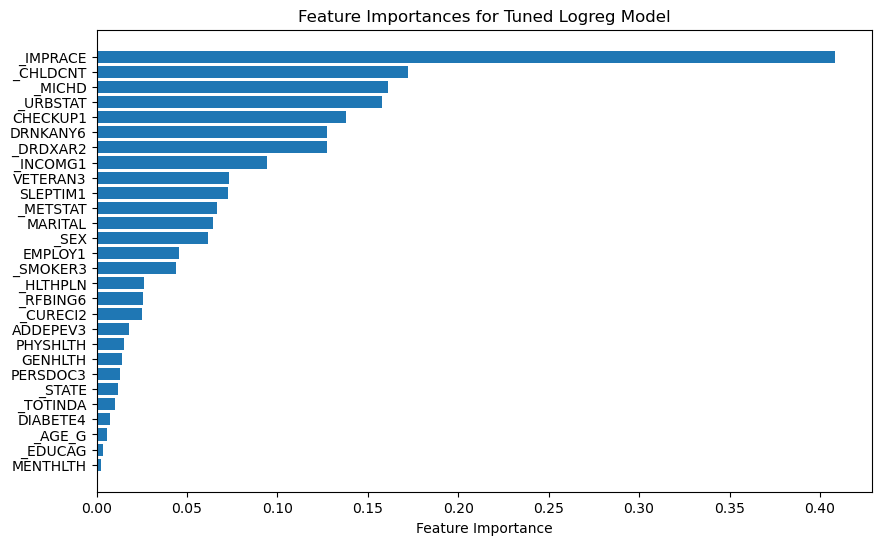

In [54]:
# Getting the coefficients (weights) of the features
coef = tuned_logreg_model.coef_[0]

# Calculating the feature importances by taking the absolute values of the coefficients
feature_importances = abs(coef)

# Getting the feature names 
feature_names = ['_STATE', '_SEX', '_AGE_G', 'MARITAL','_EDUCAG', '_INCOMG1', 'VETERAN3',
                 'EMPLOY1', '_CHLDCNT', '_METSTAT', '_URBSTAT', '_IMPRACE', 'GENHLTH', 
                 'PHYSHLTH', 'MENTHLTH', '_TOTINDA', 'SLEPTIM1', '_HLTHPLN', 'PERSDOC3',
                 'CHECKUP1', 'ADDEPEV3', '_DRDXAR2', '_MICHD', 'DIABETE4', '_SMOKER3', 
                 '_CURECI2', 'DRNKANY6', '_RFBING6']

# Creating a list of (feature_name, importance) pairs
feature_importance_pairs = list(zip(feature_names, feature_importances))

# Sorting the feature importances by importance in descending order
feature_importance_pairs.sort(key=lambda x: x[1], reverse=True)

# Printting feature importances
for feature, importance in feature_importance_pairs:
    print(f"{feature}: {importance}")

# Plotting feature importances 
plt.figure(figsize=(10, 6))
plt.barh([feature for feature, importance in feature_importance_pairs], 
         [importance for feature, importance in feature_importance_pairs])
plt.xlabel('Feature Importance')
plt.title('Feature Importances for Tuned Logreg Model')
plt.gca().invert_yaxis() 
plt.show()

    

### LogReg Model with Feature Importances

In [56]:
# Selecting top 15 important features
top_features = ['_IMPRACE', '_CHLDCNT', '_MICHD', '_URBSTAT', 'CHECKUP1', 'DRNKANY6', '_DRDXAR2', 
               '_INCOMG1', 'VETERAN3', 'SLEPTIM1', '_METSTAT', 'MARITAL', '_SEX', 'EMPLOY1', '_SMOKER3']

# Reducing training and test sets to important features
X_train_feat = X_final_train[top_features]
y_train_feat = X_final_train['Obese']

X_test_feat = X_final_test[top_features]
y_test_feat = X_final_test['Obese']

print(X_train_feat.info())

<class 'pandas.core.frame.DataFrame'>
Index: 209405 entries, 383796 to 36923
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _IMPRACE  209405 non-null  float64
 1   _CHLDCNT  209405 non-null  float64
 2   _MICHD    209405 non-null  float64
 3   _URBSTAT  209405 non-null  float64
 4   CHECKUP1  209405 non-null  float64
 5   DRNKANY6  209405 non-null  float64
 6   _DRDXAR2  209405 non-null  float64
 7   _INCOMG1  209405 non-null  float64
 8   VETERAN3  209405 non-null  float64
 9   SLEPTIM1  209405 non-null  float64
 10  _METSTAT  209405 non-null  float64
 11  MARITAL   209405 non-null  float64
 12  _SEX      209405 non-null  float64
 13  EMPLOY1   209405 non-null  float64
 14  _SMOKER3  209405 non-null  float64
dtypes: float64(15)
memory usage: 25.6 MB
None


In [57]:
# Initiating the scaler
scaler = StandardScaler()

# Transform the training and test sets
X_train_scaled_ft = scaler.fit_transform(X_train_feat)
X_test_scaled_ft = scaler.transform(X_test_feat)

# Using Smote to address class imbalance with target variable 
sm = SMOTE(random_state=42)
X_train_resample_ft, y_train_resample_ft = sm.fit_resample(X_train_scaled_ft, y_train_feat)

# Convert into a DataFrame 
scaled_data = pd.DataFrame(X_train_scaled_ft, columns= X_train_feat.columns)
scaled_data.head()



# Set the seed for reproducibility
np.random.seed(42)

# Define the percentage of the original training set to use
percentage_to_use = 0.25 

# Split the original training set into a smaller subset
sample_train_X_ft, _, sample_train_y_ft, _ = train_test_split(
    X_train_resample_ft, y_train_resample_ft, 
    train_size= percentage_to_use, 
    stratify= y_train_resample_ft,  # Maintain class distribution
    random_state=42   
)

# Print the shape of the new subset
print("Sample Train X Shape:", sample_train_X_ft.shape)
print("Sample Train Y Shape:", sample_train_y_ft.shape)

Sample Train X Shape: (69714, 15)
Sample Train Y Shape: (69714,)


In [58]:
# Instantiate the model with tuned hyperparameters
tuned_logreg_model = LogisticRegression(random_state=42,
                                        C=0.1,
                                        penalty='l2',
                                        solver='saga',
                                        max_iter=4,
                                        class_weight='balanced')

# Fit the model to the data
tuned_logreg_model.fit(sample_train_X_ft, sample_train_y_ft)

# Making predictions
y_base_tuned_pred = tuned_logreg_model.predict(X_test_scaled_ft)

# Evaluate model performance
tuned_logreg_score = tuned_logreg_model.score(X_test_scaled_ft, y_test_feat)
tuned_logreg_train_score = tuned_logreg_model.score(sample_train_X_ft, sample_train_y_ft)
tuned_logreg_cv = cross_val_score(tuned_logreg_model, sample_train_X_ft, sample_train_y_ft)

print("Tuned Logreg Training Score:", tuned_logreg_train_score)
print("Tuned Logreg Test Score:", tuned_logreg_score)
print("Tuned Cross Validation Scores:", tuned_logreg_cv)

# Classification metrics for tuned baseline model
model_scores(tuned_logreg_model, sample_train_X_ft, X_test_scaled_ft, sample_train_y_ft, y_test_feat)


Tuned Logreg Training Score: 0.573256447772327
Tuned Logreg Test Score: 0.5803440650219708
Tuned Cross Validation Scores: [0.56860073 0.57713548 0.57534247 0.56852901 0.57825276]
Model's Train Score: 0.573256447772327
---------------------------------
Model's Test Score: 0.5803440650219708
---------------------------------
Cross Validation Scores: [0.56860073 0.57713548 0.57534247 0.56852901 0.57825276]
---------------------------------
Model's Accuracy Score: 0.5803440650219708
---------------------------------
Model's Precision Score: 0.40481943031536116
---------------------------------
Model's F1 Score: 0.4656622540773788
---------------------------------
Model's Recall Score: 0.5480289206403857


After generating feature importances, I experimented with running the tuned logistic model utiliziing the top 15 features. This resulted in much lower performance however did lead to less overfitting, in fact the model performed better on the test set than the training set. 

# Neural Network Modeling 

Currently the best model is the tuned logistic regression model. For comparison I plan to utilize neural network modeling to see if performance can be improved compared to the logistic regression model. 

I plan to run a baseline neural network model and will first subset from the initial training set to speed up computation. This will be sampled from the initial training set after it was scaled/normalized.

In [59]:
# Set the seed for reproducibility
np.random.seed(42)

# Define the percentage of the original training set to use
percentage_to_use = 0.25 

# Split the original training set into a smaller subset
X_train_red, _, y_train_red, _ = train_test_split(
    X_train_scaled, y_train, 
    train_size= percentage_to_use, 
    stratify= y_train,  
    random_state=42   
)

# Print the shape of the new subset
print("Reduced Train X Shape:", X_train_red.shape)
print("Reduced Train Y Shape:", y_train_red.shape)

Reduced Train X Shape: (52351, 29)
Reduced Train Y Shape: (52351,)


In [61]:
# Define a function to plot training curves
def plot_curves(history):
    # Plot training accuracy values
    plt.plot(history.history['accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train'], loc='upper left')
    plt.show()

    # Plot training loss values
    plt.plot(history.history['loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train'], loc='upper left')
    plt.show()

# Define a function to get evaluation metrics
def get_evaluation_metrics(model):

    # Evaluate the model 
    test_evaluation_results = model.evaluate(X_test_scaled, y_test)
    train_evaluation_results = model.evaluate(X_train_red, y_train_red)

    # Print all evaluation results
    print("Test Evaluation Results:", test_evaluation_results)
    print("Train Evaluation Results:", train_evaluation_results)

    # Access specific values
    test_loss = test_evaluation_results[0]
    test_acc = test_evaluation_results[1]
    test_f1 = test_evaluation_results[2]
    test_recall = test_evaluation_results[3]
    train_loss = train_evaluation_results[0]
    train_acc = train_evaluation_results[1]
    train_f1 = train_evaluation_results[2]
    train_recall = train_evaluation_results[3]


    # Print specific values
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_acc)
    print("Test F1 Score:", test_f1)
    print("Test Recall Score:", test_recall)
    print("Train Loss:", train_loss)
    print("Train Accuracy:", train_acc)
    print("Train F1 Score:", train_f1)
    print("Train Recall Score:", train_recall)

### Baseline NN

Epoch 1/20
350/350 [==============================] - 3s 3ms/step - loss: 0.4884 - accuracy: 0.7175 - f1_metric: 0.5174 - recall_m: 0.4829
Epoch 2/20
350/350 [==============================] - 1s 2ms/step - loss: 0.4483 - accuracy: 0.7353 - f1_metric: 0.5917 - recall_m: 0.5849
Epoch 3/20
350/350 [==============================] - 1s 4ms/step - loss: 0.4431 - accuracy: 0.7397 - f1_metric: 0.6066 - recall_m: 0.6062
Epoch 4/20
350/350 [==============================] - 1s 3ms/step - loss: 0.4396 - accuracy: 0.7424 - f1_metric: 0.6112 - recall_m: 0.6108
Epoch 5/20
350/350 [==============================] - 1s 3ms/step - loss: 0.4373 - accuracy: 0.7459 - f1_metric: 0.6179 - recall_m: 0.6204
Epoch 6/20
350/350 [==============================] - 1s 2ms/step - loss: 0.4362 - accuracy: 0.7472 - f1_metric: 0.6187 - recall_m: 0.6187
Epoch 7/20
350/350 [==============================] - 1s 3ms/step - loss: 0.4348 - accuracy: 0.7495 - f1_metric: 0.6186 - recall_m: 0.6177
Epoch 8/20
350/350 [=======

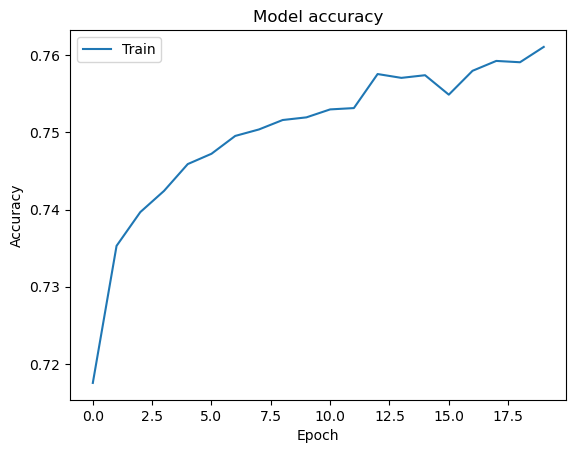

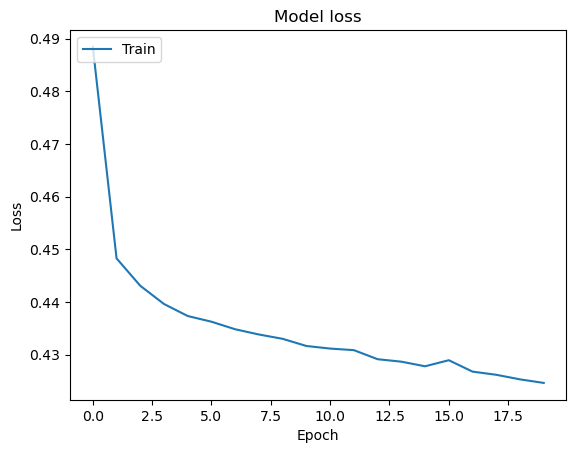

In [63]:
# Baseline NN with 20 epochs, batch_size 150
# X_train_red, y_train_red

# Number of input features
n_features = X_train_red.shape[1]

# Define a custom F1 score metric function using TensorFlow operations
def f1_metric(y_true, y_pred):
    y_pred = tf.round(y_pred)
    true_positives = tf.reduce_sum(tf.cast(y_true * y_pred, 'float'), axis=0)
    possible_positives = tf.reduce_sum(tf.cast(y_true, 'float'), axis=0)
    predicted_positives = tf.reduce_sum(tf.cast(y_pred, 'float'), axis=0)
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    f1 = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())
    return tf.reduce_mean(f1)
    
# Function to calculate recall
def recall_m(y_true, y_pred):
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    possible_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    return recall

# Initialize a sequential model
nn_model = models.Sequential()

# Two layers with relu activation
nn_model.add(layers.Dense(50, activation='relu', input_shape=(n_features,)))
nn_model.add(layers.Dense(25, activation='relu'))

# One layer with sigmoid activation 
nn_model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
nn_model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy', f1_metric, recall_m])

# Train the model 
history = nn_model.fit(X_train_red, 
                    y_train_red,
                    epochs=20,
                    batch_size=150)

# Evaluate the model 
get_evaluation_metrics(nn_model)
plot_curves(history)

### Best NN Model

Compared to the initial NN, the best performing NN was adjusting by balancing class weights to account for class imbalance, learning rate was adjusted to 0.001, an additional dense layer was added to increase complexity, batch size was reduced to 50 and epochs were decreased to 5. 

Epoch 1/5
1048/1048 [==============================] - 4s 3ms/step - loss: 0.4786 - accuracy: 0.6933 - f1_metric: 0.6534 - recall_m: 0.8922
Epoch 2/5
1048/1048 [==============================] - 3s 3ms/step - loss: 0.4581 - accuracy: 0.7044 - f1_metric: 0.6688 - recall_m: 0.9151
Epoch 3/5
1048/1048 [==============================] - 2s 2ms/step - loss: 0.4551 - accuracy: 0.7080 - f1_metric: 0.6718 - recall_m: 0.9135
Epoch 4/5
1048/1048 [==============================] - 3s 2ms/step - loss: 0.4528 - accuracy: 0.7114 - f1_metric: 0.6738 - recall_m: 0.9115
Epoch 5/5
1636/1636 [==============================] - 3s 2ms/step - loss: 0.4735 - accuracy: 0.7064 - f1_metric: 0.6746 - recall_m: 0.9437
Test Evaluation Results: [0.4809771776199341, 0.7005801200866699, 0.6671204566955566, 0.9323569536209106]
Train Evaluation Results: [0.4734550714492798, 0.7064430713653564, 0.6745701432228088, 0.9437097907066345]
Test Loss: 0.4809771776199341
Test Accuracy: 0.7005801200866699
Test F1 Score: 0.667120

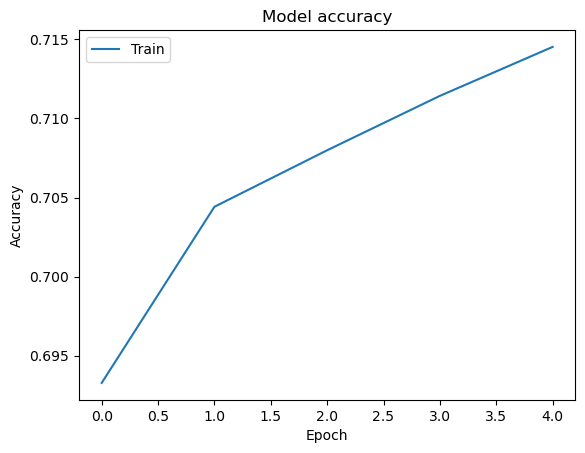

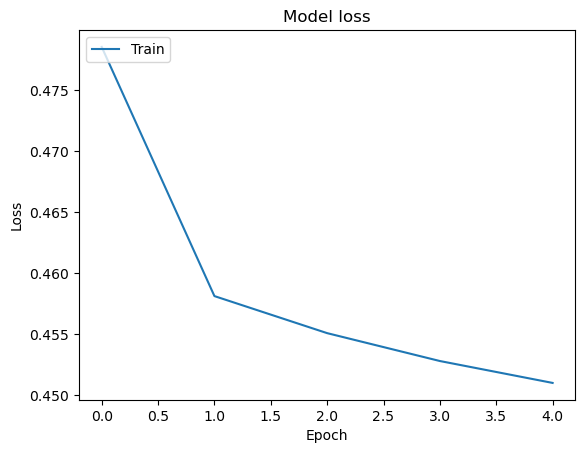

In [71]:
# Adjusted learning rate to 0.001
# Class weights balanced 
# Batch size of 50
# Epochs at 5

import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight


# Balancing class weights to account for class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_red), y=y_train_red)
class_weights_dict = {i: w for i, w in enumerate(class_weights)}

# Initialize a sequential model
nn_model1 = tf.keras.models.Sequential()

# Add layers to the model
nn_model1.add(tf.keras.layers.Dense(50, activation='relu', input_shape=(n_features,)))
nn_model1.add(tf.keras.layers.Dense(50, activation='relu'))
nn_model1.add(tf.keras.layers.Dense(25, activation='relu'))
nn_model1.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Define optimizer with a smaller learning rate
optimizer = optimizers.Adam(lr=0.001)  # Adjust the learning rate as needed

# Compile the model with custom metrics and the new optimizer
nn_model1.compile(optimizer= optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', f1_metric, recall_m])
# Train the model
history1 = nn_model1.fit(X_train_red, 
                      y_train_red,
                      epochs=5,
                      batch_size=50, 
                      class_weight=class_weights_dict )

# Evaluate the model 
get_evaluation_metrics(nn_model1)

plot_curves(history1)


In [ ]:
# Predict on test data
y_pred = nn_model1.predict_classes(X_test_scaled)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Obese', 'Obese'], yticklabels=['Not Obese', 'Obese'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Looking at the baseline NN model compared to the best performing NN model, while test accuracy decreased slightly, test recall greatly improved while F1 score also improved. Both models training and test scores were close indiciating that the models were not showing signs of overfitting. 

Baseline NN:

- Train Accuracy: 0.7647991180419922
- Test Accuracy: 0.7401993274688721
- Test F1 Score: 0.5747455358505249
- Test Recall Score: 0.5564661622047424


Best Performing NN:

- Train Accuracy: 0.7064430713653564
- Test Accuracy: 0.7005801200866699
- Test F1 Score: 0.6671204566955566
- Test Recall Score: 0.9323569536209106


# Evaluation 

After building and tuning the baseline logistic regression, random forest classifier, and neural network models, the tuned logistic regression and adjusted/tuned neural network models had the best performance by standards (Accuracy, F1 and Recall scores). The adjusted neural network model was very much similar to the tuned logistic model in metrics with the differences being that the the tuned logistic model was slightly higher with recall and F1 score and the nn model was slightly higher with accuracy. Teh adjusted neural network was chosen as the ideal model as most evaluation metrics were the same as far as performance, the different in these models was that the neural networks train and test scores were very similar indicating that the model was not overfitting or underfitting the data. 

With the best performing model (tuned neural network) the scores were:

- Train Accuracy: 0.7064430713653564
- Test Accuracy: 0.7005801200866699
- Test F1 Score: 0.6671204566955566
- Test Recall Score: 0.9323569536209106

Tuned logistic model:

- Train Score: 0.7542674355222767
- Test Accuracy Score: 0.6912030787788277
- F1 Score: 0.6701739317156967
- Recall Score: 0.9402220692029609

Train and test scores were pretty close in value, indicating that the model was not underfitting or overfitting the data. While the test/accuracy score was not the best of all models, its score of 0.7006 was still slightly higher than baseline. Having a score of 0.7006 indicates that out of all the predictions the model made, 70.06 % were correct. This includes true positives (individuals with obesity) and true negatives(individuals without obesity).

Recall: The model's overall recall score was 0.9323 which means that out of all of the individuals/patients that actually had obesity, the model correctly identified 93.23 % of those.


F1 Score: The model's overall score was 0.6671 which takes into account both of precision and recall. Generally if this value is higher, this indicated the model is doing well all around. Given that the model is skewed mored towards recall and less towards precision, the F1 score penalizes the model in this case.

Overall, the tuned baseline neural netwrok model was the best performing model by the chosen metrics (Accuracy, Recall and F1 scores) used to evaluate the model. Since accuracy, recall and F1 score are the metrics that are being weighed more heavily for evaluation, the tuned neural network model is the ideal model to choose here because it performs better at correctly identifying positive individuals with obesity. While this model is higher with recall and correctly identifying those with obesity, there is the chance for more false positive results with this model due to the trade off of higher recall and lower precision.

When looking into the features, the most important features for this model are race, number of children the person has and history of heart disease/heart attack, with the most important feature being race. With these being the biggest predictors for the model (for identifying obesity), these characteritics should be considered when considering public health initiatives/ interventions. 


# Conclusion/ Recommendations 

The tuned neural network model showed the best performance in identifying those with obesity based on the various features and demogrpahics and lifestyle factors. The model showed that out of all individuals with obesity, it could correctly identify 93.23 % of those individuals. This can provide great benefit for public health professionals by increasing detection and allowing targeted and specific interventions. By adressing this health concern early, this can improve an individuals quality of life and overall health outcomes by preventing accerleration of disease and negative health consequences while also decreasing the load on the healthcare system and the providers.

Recommendations:

- Public health professionals should utilize this model as an additional tool when determining public health initiatives/ interventions aimed at obesity. 

- While this model is not an official diagnostic tool for obesity, this model can be utilized for identification. Using this model, preventative health methods, such as dietary education or exercise recommendations, could be implemented early on before disease progression or development of other co-morbidities.

- Public Health Policy makers should also utilize this model and information to develop targeted interventions based on the most influence features that seem to contribute to obesity.


# Limitations
While the model can be useful to predicting individuals with obesity based on various health and lifestyles factors, the model is not perfect and does have it's limitations.

- False positives: When individuals actually have obesity, the model correctly identifies those indiviudals approximiately 93.23% of the time. With having a higher recall, there is an increased risk of mislabeling indiviudals without obesity as having obesity. While there is this increased chance, having an increased risk of incorrectly identifying someone as having obesity is a better trade off in this situation that incorrectly labeling someone as not having obesity when they in fact do have obesity. If someone is labeled as a false positive, recommending lifestyle interventions to address obesity could still be good advice as a preventative thought to a healthy normal weight individiual. 

- Data loss: the initial dataset was very large with more columns and numerous missing values. To less the burden on computation power and speed up run times, numerous null values were dropped and the dataset was subsampled to run models on a smaller training percentage. 

- Numerous Features: Only a subset of features/ columns were explore leading other features to no be accounted for which could potentially have affects on the target variable. 

# Contact Information

- Email: ldwilker10@gmail.com

- GitHub: https://github.com/ldwilker10

- LinkedIn: https://www.linkedin.com/in/lucasdukewilkerson/